# Intro

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from explorer_helper import *

In [ ]:
df = get_df()
df

## Currently running

In [165]:
# exactGP for large N (compare time with KISS-GP and accuracy)
# KISS-GP for large N
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '10:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

Ns = [150]

kissmodels = lambda M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 20,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'train_eval_cg_tolerance': 0.01,
                'use_cg': True,
                'noise': None
            }
        }
    }
}

for model in [kissmodels(100)]:
    for N in Ns:
        run = execute(config_updates={
            'tag': 'test',
            'obj_func': {
                'name': 'Branin',
                'kwargs': {'noise': 0.01}
            },            
            'model': model,
            'gp_samples': N,
            'use_sample_grid': True,
        })

source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="test"\x27 \x27obj_func={"name": "Branin", "kwargs": {"noise": 0.01}}\x27 \x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 20, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "train_eval_cg_tolerance": 0.01, "use_cg": True, "noise": None}}}}\x27 \x27gp_samples=150\x27 \x27use_sample_grid=True\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/10:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="test"\\x27 \\x27obj_func={"name": "Branin", "kwargs": {"noise": 0.01}}\\x27 \\x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": 

In [161]:
df = get_df(status=None)
df = df.sort_values('id', ascending=False)
df = df.iloc[:50]

def get_M(r):
    SS_M = r.config.model.kwargs.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    return r.config.model.kwargs.model.kwargs.gp_kwargs.get('n_grid', None)

In [162]:
df['captured_out'] = df.apply(lambda r: r.exp.captured_out, axis=1)
df['heartbeat'] = df.apply(lambda r: r.exp.heartbeat, axis=1)
df['start'] = df.apply(lambda r: r.exp.start_time, axis=1)
df['duration'] = df.apply(lambda r: (r.exp.heartbeat - r.exp.start_time) if not pd.isnull(r.exp.heartbeat) else 0, axis=1)
df['double'] = df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
df['PCG'] = df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('precond_size', 10), axis=1)
df['newest loss'] = df.apply(lambda r: r.exp.metrics.get('DKLGPModel.training.loss', pd.Series([None])).iloc[-1], axis=1)
df['M'] = df.apply(get_M, axis=1)

df[['status', 'M', 'double', 'N', 'PCG', 'id', 'model', 'duration', 'newest loss' ,'tag']]

,status,M,double,N,PCG,id,model,duration,newest loss,tag
exp_hash,,,,,,,,,,
57376da389430e90c454802ba3d85f1c34761ad1,FAILED,100.0,True,150.0,50,2159.0,N<DKLGPModel>,0:03:06.682000,NaN,heston
ce4f9e6d021ae94583a6e3e03355b77388e5ca30,FAILED,100.0,False,139360.0,50,2158.0,N<DKLGPModel>,0:01:56.023000,1.378889,AAPL
ce4f9e6d021ae94583a6e3e03355b77388e5ca30,FAILED,100.0,False,139360.0,50,2157.0,N<DKLGPModel>,0:01:55.720000,1.378887,AAPL
6865329f5cf2428b3c52409c43c96347692f8461,FAILED,NaN,False,100.0,10,2156.0,SGPR,0:00:13.759000,NaN,default
6865329f5cf2428b3c52409c43c96347692f8461,COMPLETED,NaN,False,100.0,10,2155.0,SGPR,0:00:32.524000,NaN,default
6865329f5cf2428b3c52409c43c96347692f8461,FAILED,NaN,False,100.0,10,2154.0,SGPR,0:00:04.015000,NaN,default
8d63eec62063f731a943fb9a2b7847d9ff25da7f,FAILED,100.0,False,139360.0,50,2153.0,N<DKLGPModel>,0:19:11.422000,1.370956,AAPL
6865329f5cf2428b3c52409c43c96347692f8461,FAILED,NaN,False,100.0,10,2152.0,SGPR,0:00:08.451000,NaN,default
2e898df7d36d2f0336ebeef6ee936963ccd505df,FAILED,100.0,False,139360.0,50,2151.0,N<DKLGPModel>,0:18:06.606000,1.371094,AAPL


In [160]:
exp = df[df['id'] == 2159].iloc[0]
#exp.exp.fail_trace
exp.exp.captured_out

'INFO - lions - Running command \'main\'\nINFO - lions - Started run with ID "2159"\n'

# High-dim

## Embeddings

### Create

In [149]:
DKLModel = {
    'name': 'DKLGPModel',
    'kwargs': {
        'learning_rate': 0.1,
        'n_iter': 1000,
        'nn_kwargs': {'layers': [1]},
        'use_cg': True,
        'noise': None
    },
}

functions = [
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 2}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 5}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 10}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 50}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 100}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 2}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 5}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 10}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 50}},
 ]

run = None

for func in functions:
    config = normalize_config({
        'tag': 'embeddings',
        'obj_func': func,
        'model': DKLModel,
        'gp_use_derivatives': model.get('name') == 'TransformerModel',
        'gp_samples': 1000,
    })
    run = execute(config_updates=config)

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "ActiveSubspaceArbitrary1D", "kwargs": {"D": 2}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1]}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_use_derivatives=False\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "ActiveSubspaceArbitrary1D", "kwargs": {"D": 5}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1]}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_use_derivatives=False\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\'

In [150]:
nn = {
        'name': 'LinearFromFeatureExtractor',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 300,
            'nn_kwargs': {'layers': [100,50,5]},
        }
    }

dnnblr = {
        'name': 'DNNBLR',
        'kwargs': {
            'do_pretrain': True,
            'pretrain_n_iter': 200,
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': [100, 50, 5]},
            'max_cg_iter': 3000,
            'precond_size': 10,
            'use_cg': True,
            'noise': None,
            #'use_double_precision': True,
            #'noise_lower_bound': 1e-8
        }
    }

exactGP = {
    'name': 'DKLGPModel',
    'kwargs': {
        'learning_rate': 0.01,
        'n_iter': 1000,
        'nn_kwargs': {'layers': None},
        'use_cg': True,
        'noise': None
    },
}


DKLModel = {
    'name': 'DKLGPModel',
    'kwargs': {
        'learning_rate': 0.01,
        'n_iter': 1000,
        'nn_kwargs': {'layers': [100, 50, 2]},
        'use_cg': True,
        'noise': None
    },
}

transformer = {
    'name': 'ActiveSubspace',
    'kwargs': {
        'output_dim': 1
    }
}

models = [
    nn,
    dnnblr,
    {
        'name': 'TransformerModel',
        'kwargs': {
            'transformer': transformer,
            'prob_model': exactGP
        },
    },
    {
        'name': 'TransformerModel',
        'kwargs': {
            'transformer': transformer,
            'prob_model': DKLModel
        },
    },
    DKLModel
]


functions = [
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 2}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 5}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 10}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 50}},
    {'name': 'ActiveSubspaceArbitrary1D', 'kwargs': {'D': 100}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 2}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 5}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 10}},
    {'name': 'KinkDCircularEmbedding', 'kwargs': {'D': 50}},
 ]

run = None

for func in functions:
    for model in models:
        config = normalize_config({
            'tag': 'embeddings',
            'obj_func': func,
            'model': model,
            'gp_use_derivatives': model.get('name') == 'TransformerModel',
            'gp_samples': 1000,
        })
        run = execute(config_updates=config)


['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "ActiveSubspaceArbitrary1D", "kwargs": {"D": 2}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LinearFromFeatureExtractor", "kwargs": {"learning_rate": 0.1, "n_iter": 300, "nn_kwargs": {"layers": [100, 50, 5]}}}, "normalize_input": True, "normalize_output": True}}\' \'gp_use_derivatives=False\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "ActiveSubspaceArbitrary1D", "kwargs": {"D": 2}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DNNBLR", "kwargs": {"do_pretrain": True, "pretrain_n_iter": 200, "learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": [100, 50, 5]}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_use_derivatives=False\' \'gp_sa

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "ActiveSubspaceArbitrary1D", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DNNBLR", "kwargs": {"do_pretrain": True, "pretrain_n_iter": 200, "learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": [100, 50, 5]}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_use_derivatives=False\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "ActiveSubspaceArbitrary1D", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "TransformerModel", "kwargs": {"transformer": {"name": "ActiveSubspace", "kwargs": {"output_dim": 1}}, "prob_model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 1000, "nn_kwargs": {"la

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "KinkDCircularEmbedding", "kwargs": {"D": 5}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "TransformerModel", "kwargs": {"transformer": {"name": "ActiveSubspace", "kwargs": {"output_dim": 1}}, "prob_model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 1000, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None}}}}, "normalize_input": True, "normalize_output": True}}\' \'gp_use_derivatives=True\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="embeddings"\' \'obj_func={"name": "KinkDCircularEmbedding", "kwargs": {"D": 5}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "TransformerModel", "kwargs": {"transformer": {"name": "ActiveSubspace", "kwargs": {"output_dim": 1}}, "prob_model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n

### View

In [103]:
df = get_df()
exps_rows_df = df[df["tag"] == "embeddings"].copy()
exps_rows_df = exps_rows_df[exps_rows_df['id'] > 1000]
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.max_err,result.mll,result.mnlp,result.nmse,result.pmll,result.rmse,result.time:pred,result.time:training,status,tag
exp_hash,,,,,,,,,,,,,,,,,,,,,
10dfd530ac0a88dacd355129096f26b96e897edf,1000.0,None,False,{'exp_hash': '10dfd530ac0a88dacd355129096f26b9...,"Experiment(id=1935, name=lions)",KinkDCircularEmbedding2,1935,N<DKLGPModel>,None,c83d145d2e6a6a2a742accb6310d9ab331a7ba87,...,1.187512,NaN,2.329543e+03,0.003107,NaN,0.110691,1.76,234.18,COMPLETED,embeddings
10dfd530ac0a88dacd355129096f26b96e897edf,1000.0,None,False,{'exp_hash': '10dfd530ac0a88dacd355129096f26b9...,"Experiment(id=1616, name=lions)",KinkDCircularEmbedding2,1616,N<DKLGPModel>,None,c83d145d2e6a6a2a742accb6310d9ab331a7ba87,...,1.348751,NaN,NaN,NaN,NaN,0.161397,1.75,193.66,COMPLETED,embeddings
124ff9a9a28687673b03dc24c280f6567c6df6a1,1000.0,None,False,{'exp_hash': '124ff9a9a28687673b03dc24c280f656...,"Experiment(id=1667, name=lions)",ActiveSubspaceArbitrary1D100,1667,N<DNNBLR>,None,f9678f3c5a27222c8f3ff1c3073458089082791d,...,0.291282,NaN,NaN,NaN,NaN,0.059960,0.22,31.62,COMPLETED,embeddings
124ff9a9a28687673b03dc24c280f6567c6df6a1,1000.0,None,False,{'exp_hash': '124ff9a9a28687673b03dc24c280f656...,"Experiment(id=1927, name=lions)",ActiveSubspaceArbitrary1D100,1927,N<DNNBLR>,None,f9678f3c5a27222c8f3ff1c3073458089082791d,...,0.263769,NaN,6.145741e+04,0.019211,NaN,0.056513,0.10,24.10,COMPLETED,embeddings
1631a32355bf346eb1a37d9e2fc87eaa4240af31,1000.0,None,False,{'exp_hash': '1631a32355bf346eb1a37d9e2fc87eaa...,"Experiment(id=1924, name=lions)",ActiveSubspaceArbitrary1D50,1924,"N<T<ActiveSubspace,DKLGPModel>>",None,1a2c1b959417685fc552e6fdec7a3492a7454a2d,...,0.030139,NaN,NaN,0.000027,NaN,0.002259,2.07,250.72,COMPLETED,embeddings
1631a32355bf346eb1a37d9e2fc87eaa4240af31,1000.0,None,False,{'exp_hash': '1631a32355bf346eb1a37d9e2fc87eaa...,"Experiment(id=1609, name=lions)",ActiveSubspaceArbitrary1D50,1609,"N<T<ActiveSubspace,DKLGPModel>>",None,1a2c1b959417685fc552e6fdec7a3492a7454a2d,...,0.009893,NaN,NaN,NaN,NaN,0.001451,0.48,201.90,COMPLETED,embeddings
1e98cb81160ec89006e97d272c1d3a4f12f17ac2,1000.0,None,False,{'exp_hash': '1e98cb81160ec89006e97d272c1d3a4f...,"Experiment(id=1941, name=lions)",KinkDCircularEmbedding10,1941,N<LinearFromFeatureExtractor>,None,562d84dc79cea0934c6acd428299eecb07aabfce,...,1.232935,NaN,NaN,0.060519,NaN,0.049242,0.01,4.08,COMPLETED,embeddings
1e98cb81160ec89006e97d272c1d3a4f12f17ac2,1000.0,None,False,{'exp_hash': '1e98cb81160ec89006e97d272c1d3a4f...,"Experiment(id=1673, name=lions)",KinkDCircularEmbedding10,1673,N<LinearFromFeatureExtractor>,None,562d84dc79cea0934c6acd428299eecb07aabfce,...,1.328219,NaN,NaN,NaN,NaN,0.039201,0.01,24.43,COMPLETED,embeddings
1ede5c5b396fda27dcae787f80ceb6d699838eca,1000.0,None,False,{'exp_hash': '1ede5c5b396fda27dcae787f80ceb6d6...,"Experiment(id=1899, name=lions)",ActiveSubspaceArbitrary1D5,1899,N<DKLGPModel>,None,de49801f53f24329eedc084c4a804ff6063840a1,...,2.296076,NaN,NaN,22.056656,NaN,0.527978,2.05,976.59,COMPLETED,embeddings


In [104]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['f', 'model', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
f                            model                           M   N      f                                             
ActiveSubspaceArbitrary1D10  N<DKLGPModel>                   NaN 1000.0 ActiveSubspaceArbitrary1D10        0.003263   
                                                                        ActiveSubspaceArbitrary1D10        0.000704   
                             N<DNNBLR>                       NaN 1000.0 ActiveSubspaceArbitrary1D10        0.007085   
                             N<LinearFromFeatureExtractor>   NaN 1000.0 ActiveSubspaceArbitrary1D10        0.019025   
                             N<T<ActiveSubspace,DKLGPModel>> NaN 1000.0 ActiveSubspaceArbitrary1D10        0.002500   
                                                                        ActiveSubspaceArbitrary1D10        0.004316   
ActiveSubspaceArbitrary1D100 N<DKLGPModel>                   NaN 1000.0 ActiveSubspaceArbitrary1D100       0.022147   
                                                                        ActiveSubspaceArbitrary1D100       0.001136   
                             N<DNNBLR>                       NaN 1000.0 ActiveSubspaceArbitrary1D100       0.058237   
                             N<LinearFromFeatureExtractor>   NaN 1000.0 ActiveSubspaceArbitrary1D100       0.195166   
                             N<T<ActiveSubspace,DKLGPModel>> NaN 1000.0 ActiveSubspaceArbitrary1D100       0.001531   
                                                                        ActiveSubspaceArbitrary1D100       0.001526   
ActiveSubspaceArbitrary1D2   N<DKLGPModel>                   NaN 1000.0 ActiveSubspaceArbitrary1D2         0.633200   
                                                                        ActiveSubspaceArbitrary1D2         0.001039   
                             N<DNNBLR>                       NaN 1000.0 ActiveSubspaceArbitrary1D2         0.004355   
                             N<LinearFromFeatureExtractor>   NaN 1000.0 ActiveSubspaceArbitrary1D2         0.006787   
                             N<T<ActiveSubspace,DKLGPModel>> NaN 1000.0 ActiveSubspaceArbitrary1D2         0.004601   
                                                                        ActiveSubspaceArbitrary1D2         0.005586   
ActiveSubspaceArbitrary1D5   N<DKLGPModel>                   NaN 1000.0 ActiveSubspaceArbitrary1D5         0.527978   
                                                                        ActiveSubspaceArbitrary1D5         0.001613   
                             N<DNNBLR>                       NaN 1000.0 ActiveSubspaceArbitrary1D5         0.013070   
                             N<LinearFromFeatureExtractor>   NaN 1000.0 ActiveSubspaceArbitrary1D5         0.012491   
                             N<T<ActiveSubspace,DKLGPModel>> NaN 1000.0 ActiveSubspaceArbitrary1D5         0.005973   
                                                                        ActiveSubspaceArbitrary1D5         0.004057   
ActiveSubspaceArbitrary1D50  N<DKLGPModel>                   NaN 1000.0 ActiveSubspaceArbitrary1D50        0.001444   
                                                                        ActiveSubspaceArbitrary1D50        0.006621   
                             N<DNNBLR>                       NaN 1000.0 ActiveSubspaceArbitrary1D50        0.029666   
                             N<LinearFromFeatureExtractor>   NaN 1000.0 ActiveSubspaceArbitrary1D50        0.089215   
                             N<T<ActiveSubspace,DKLGPModel>> NaN 1000.0 ActiveSubspaceArbitrary1D50        0.001855   
                                                                        ActiveSubspaceArbitrary1D50        0.001576   
KinkDCircularEmbedding10     N<DKLGPModel>                   NaN 1000.0 KinkDCircularEmbedding10           0.075809   
                                                                        KinkDCircularEmbedding10           0.027878   
                             N<DNNBLR>                    

## Genz

### Create

In [130]:
Ds = [2,5,10,50]
functions = ['GenzContinuous', 'GenzCornerPeak', 'GenzDiscontinuous', 'GenzGaussianPeak', 'GenzOscillatory', 'GenzProductPeak']

nn = {
        'name': 'LinearFromFeatureExtractor',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 1000,
            'nn_kwargs': {'layers': [1000, 500, 5]},
        }
    }

dnnblr = {
        'name': 'DNNBLR',
        'kwargs': {
            #'do_pretrain': True,
            #'pretrain_n_iter': 200,
            'learning_rate': 0.1,
            'n_iter': 1000,
            'nn_kwargs': {'layers': [1000, 500, 5]},
            'max_cg_iter': 3000,
            'precond_size': 10,
            'use_cg': True,
            'noise': None,
            #'use_double_precision': True,
            #'noise_lower_bound': 1e-8
        }
    }

dkl = {
    'name': 'DKLGPModel',
    'kwargs': {
        'learning_rate': 0.1,
        'n_iter': 1000,
        'nn_kwargs': {'layers': [1000, 500, 5]},
        'use_cg': True,
        'noise': None,
    },
}

gp = {
    'name': 'DKLGPModel',
    'kwargs': {
        'learning_rate': 0.1,
        'n_iter': 500,
        'nn_kwargs': {'layers': None},
        'use_cg': True,
        'noise': None,
    },
}

gpdouble = {
    'name': 'DKLGPModel',
    'kwargs': {
        'learning_rate': 0.1,
        'n_iter': 500,
        'nn_kwargs': {'layers': None},
        'use_cg': True,
        'noise': None,
        'use_double_precision': True,
        'noise_lower_bound': 1e-8
    },
}

models = [gp, gpdouble, nn, dnnblr, dkl]

for func in functions:
    for D in Ds:
        for model in models:
            run = execute(config_updates=normalize_config({
                'tag': 'genz2',
                'obj_func': {'name': func, 'kwargs': {'D': D}},
                'model': model,
                'gp_samples': 1000,
            }))

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzContinuous", "kwargs": {"D": 2}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzContinuous", "kwargs": {"D": 2}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-08}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzContinuous", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzCornerPeak", "kwargs": {"D": 2}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzCornerPeak", "kwargs": {"D"

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzCornerPeak", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DNNBLR", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzCornerPeak", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'o

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzDiscontinuous", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LinearFromFeatureExtractor", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzDiscontinuous", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DNNBLR", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzGaussianPeak", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-08}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzGaussianPeak", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LinearFromFeatureExtractor", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'ob

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzOscillatory", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzOscillatory", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-08}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzProductPeak", "kwargs": {"D": 10}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 5]}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzProductPeak", "kwargs": {"D": 50}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\' \'gp_samples=1000\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="genz2"\' \'obj_func={"name": "GenzProductPeak", "kwargs": 

In [117]:
df = get_df()
exps_rows_df = df[df["tag"] == "genz2"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
00ef89a89922dcf10fc65199136400c761d2bde1,1000.0,None,False,{'exp_hash': '00ef89a89922dcf10fc65199136400c7...,"Experiment(id=1719, name=lions)",GenzDiscontinuous10,1719,N<DKLGPModel>,None,f494f62f11817e8fbdac6a7aca959785d0b005eb,N<DKLGPModel> GenzDiscontinuous10,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",2.519863e+16,5.048065e+14,2.12,261.49,genz2
014d311c36646b31bd1ff088e7d65f9a727c3673,1000.0,None,False,{'exp_hash': '014d311c36646b31bd1ff088e7d65f9a...,"Experiment(id=1716, name=lions)",GenzDiscontinuous10,1716,N<DKLGPModel>,None,b57f4d1934bb5a9f86882bae1bd90797dc2da656,N<DKLGPModel> GenzDiscontinuous10,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",2.556344e+16,5.120132e+14,2.31,167.27,genz2
03f9ccc300701f4a0a23cfaa3c56cc65e41301e0,1000.0,None,False,{'exp_hash': '03f9ccc300701f4a0a23cfaa3c56cc65...,"Experiment(id=1744, name=lions)",GenzOscillatory5,1744,N<LinearFromFeatureExtractor>,None,562d84dc79cea0934c6acd428299eecb07aabfce,N<LinearFromFeatureExtractor> GenzOscillatory5,NaN,NaN,8.750116e-01,8.331056e-02,0.02,6.20,genz2
05f09a2b67dc9d19a5f51a6534335b28d5597adb,1000.0,None,False,{'exp_hash': '05f09a2b67dc9d19a5f51a6534335b28...,"Experiment(id=1688, name=lions)",GenzContinuous50,1688,N<DKLGPModel>,None,b57f4d1934bb5a9f86882bae1bd90797dc2da656,N<DKLGPModel> GenzContinuous50,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.361061e-20,3.721468e-22,0.84,1045.68,genz2
0870533c3e819b9f98849ad35060cbac3da6071a,1000.0,None,False,{'exp_hash': '0870533c3e819b9f98849ad35060cbac...,"Experiment(id=1723, name=lions)",GenzDiscontinuous50,1723,N<DKLGPModel>,None,f494f62f11817e8fbdac6a7aca959785d0b005eb,N<DKLGPModel> GenzDiscontinuous50,"{'pred': True, 'training': True}","{'lengthscale': {'py/object': 'numpy.ndarray',...",9.177181e+67,2.150095e+66,2.34,623.03,genz2
0a9dda7fbf87738b87aca8afa2b78d80eeadd089,1000.0,None,False,{'exp_hash': '0a9dda7fbf87738b87aca8afa2b78d80...,"Experiment(id=1702, name=lions)",GenzCornerPeak10,1702,N<DNNBLR>,None,f9678f3c5a27222c8f3ff1c3073458089082791d,N<DNNBLR> GenzCornerPeak10,{'pred': True},"{'noise': 0.00029021329828538, 'variance': {'p...",1.330912e-12,4.512611e-14,4.86,25.62,genz2
0f64c54afe57f30ca26930201c4e8cace0a378a7,1000.0,None,False,{'exp_hash': '0f64c54afe57f30ca26930201c4e8cac...,"Experiment(id=1762, name=lions)",GenzProductPeak5,1762,N<DNNBLR>,None,f9678f3c5a27222c8f3ff1c3073458089082791d,N<DNNBLR> GenzProductPeak5,NaN,"{'noise': 0.010353314690291882, 'variance': {'...",1.312683e+06,1.010543e+05,0.17,24.88,genz2
108df49385ee58a6b2c0cd29958e91e143273aa9,1000.0,None,False,{'exp_hash': '108df49385ee58a6b2c0cd29958e91e1...,"Experiment(id=1758, name=lions)",GenzProductPeak2,1758,N<DNNBLR>,None,f9678f3c5a27222c8f3ff1c3073458089082791d,N<DNNBLR> GenzProductPeak2,NaN,"{'noise': 0.0011178957065567374, 'variance': {...",3.965897e+01,1.739720e+01,0.08,15.93,genz2
117bdc3f07125a713501e27683ff48d658b075cf,1000.0,None,False,{'exp_hash': '117bdc3f07125a713501e27683ff48d6...,"Experiment(id=1709, name=lions)",GenzDiscontinuous2,1709,N<LinearFromFeatureExtractor>,None,562d84dc79cea0934c6acd428299eecb07aabfce,N<LinearFromFeatureExtractor> GenzDiscontinuous2,NaN,NaN,4.455578e+01,2.515048e+00,0.01,6.36,genz2


In [119]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)

temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)

temp_df['f.D'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.D, axis=1)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['f', 'model', 'layers', 'M', 'double'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
f                 model                         layers       M   double f                                  
GenzContinuous10  N<DKLGPModel>                 ()           NaN False  GenzContinuous10    2.651347e-04   
                                                (100, 50, 5) NaN False  GenzContinuous10    3.050927e-04   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzContinuous10    2.481967e-04   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzContinuous10    2.790225e-04   
GenzContinuous2   N<DKLGPModel>                 ()           NaN False  GenzContinuous2     4.623238e-03   
                                                (100, 50, 5) NaN False  GenzContinuous2     2.870597e-03   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzContinuous2     1.039515e-02   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzContinuous2     1.715053e-02   
GenzContinuous5   N<DKLGPModel>                 ()           NaN False  GenzContinuous5     6.057707e-03   
                                                (100, 50, 5) NaN False  GenzContinuous5     1.041919e-02   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzContinuous5     5.712903e-03   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzContinuous5     1.061754e-02   
GenzContinuous50  N<DKLGPModel>                 ()           NaN False  GenzContinuous50    3.721468e-22   
                                                (100, 50, 5) NaN False  GenzContinuous50    8.350076e-22   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzContinuous50    3.723660e-22   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzContinuous50    4.479077e-22   
GenzCornerPeak10  N<DKLGPModel>                 ()           NaN False  GenzCornerPeak10    4.988977e-14   
                                                (100, 50, 5) NaN False  GenzCornerPeak10    6.269035e-14   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzCornerPeak10    4.512611e-14   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzCornerPeak10    3.530914e-14   
GenzCornerPeak2   N<DKLGPModel>                 ()           NaN False  GenzCornerPeak2     6.569978e-02   
                                                (100, 50, 5) NaN False  GenzCornerPeak2     1.865869e-01   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzCornerPeak2     2.386995e-03   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzCornerPeak2     2.605488e-02   
GenzCornerPeak5   N<DKLGPModel>                 ()           NaN False  GenzCornerPeak5     2.847303e-05   
                                                (100, 50, 5) NaN False  GenzCornerPeak5     1.459139e-05   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzCornerPeak5     1.417875e-05   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzCornerPeak5     1.668529e-05   
GenzCornerPeak50  N<DKLGPModel>                 ()           NaN False  GenzCornerPeak50   7.724361e-103   
                                                (100, 50, 5) NaN False  GenzCornerPeak50   7.731356e-103   
...                                                                                                  ...   
GenzOscillatory10 N<DNNBLR>                     (100, 50, 5) NaN False  GenzOscillatory10   1.025833e+00   
                  N<LinearFromFeatureExtractor> (100, 50, 5) NaN False  GenzOscillatory10   9.241745e-01   
GenzOscillatory2  N<DKLGPModel>                 ()           NaN False  GenzOscillatory2    1.839377e-01   
                                                (100, 50, 5) NaN False  GenzOscillatory2    3.637941e-03   
                  N<DNNBLR>                     (100, 50, 5) NaN False  GenzOscillatory2    1.477

{'exp_hash': '80c2ccba8ee49abb13fe395cddb20a159f0205d8',
 'gp_samples': 1000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'learning_rate': 0.1,
                                           'n_iter': 500,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'use_cg': True},
                                'name': 'DKLGPModel'},
                      'normalize_input': True,
                      'normalize_output': True},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': 'b57f4d1934bb5a9f86882bae1bd90797dc2da656',
 'obj_func': {'kwargs': {'D': 2}, 'name': 'GenzProductPeak'},
 'seed': 953910296,
 'tag': 'genz2',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[0.5649046301841736, 0.6165170073509216]],
   'dtype': 'float32'},
  'noise': 0.00010156886128243059,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 0.08209486305713654,
   'dtype': 'float32'}},
 'max_err': 5.773510482505003,
 'rmse': 0.9182176547445641,
 'time:pred': 1.539999999999992,
 'time:training': 194.79000000000002}

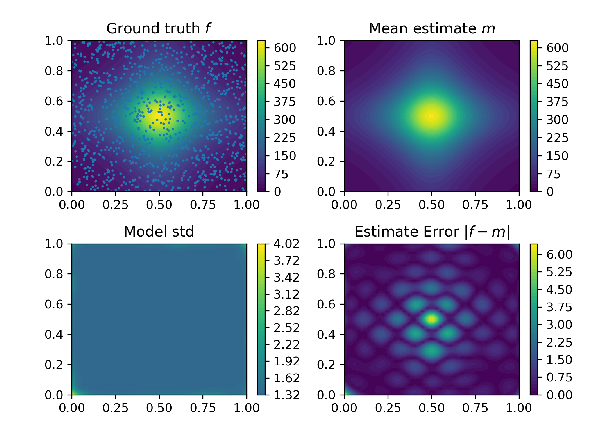

In [129]:
select_experiment_with_rmse(temp_df, 9.182177e-01).result

# Scalability

## UCI

- find out what M we can pick for other experiments (high-dim)

### Create

In [3]:
for function in [
'kin40k',
]:
    run = execute(config_updates={
        'tag': 'uci',
        'obj_func': {
            'name': 'UCI',
            'kwargs': {'name': function},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.01,
                'n_iter': 1000,
                'nn_kwargs': {'layers': [1000,1000,500,50,2]},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        },
    })    

source /etc/profile; cd mthesis; sed 's/"$@"/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="uci"\x27 \x27obj_func={"name": "UCI", "kwargs": {"name": "kin40k"}}\x27 \x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\x27/g' < hpc-dtu.sh | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/"$@"/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="uci"\\x27 \\x27obj_func={"name": "UCI", "kwargs": {"name": "kin40k"}}\\x27 \\x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\\x27/g\' < hpc-dtu.sh | bsub']


CalledProcessError: Command '['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/"$@"/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="uci"\\x27 \\x27obj_func={"name": "UCI", "kwargs": {"name": "kin40k"}}\\x27 \\x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\\x27/g\' < hpc-dtu.sh | bsub']' returned non-zero exit status 255.

In [2]:
M = 70

for function in [
    'gas',
    'skillcraft',
    'sml',
    'parkinsons',
]:
    run = execute(config_updates={
        'tag': 'uci',
        'obj_func': {
            'name': 'UCI',
            'kwargs': {'name': function},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.01,
                'n_iter': 1000,
                'nn_kwargs': {'layers': [1000,500,50,2]},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        },
    })

for function in [
'pumadyn32nm',
'pol',
'elevators',
'kin40k',
'protein',
'keggdirected',
'slice',
'keggundirected',
'3droad',
'song',
'buzz',
'houseelectric',
]:
    run = execute(config_updates={
        'tag': 'uci',
        'obj_func': {
            'name': 'UCI',
            'kwargs': {'name': function},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.01,
                'n_iter': 1000,
                'nn_kwargs': {'layers': [1000,1000,500,50,2]},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        },
    })    

source /etc/profile; cd mthesis; sed 's/"$@"/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="uci"\x27 \x27obj_func={"name": "UCI", "kwargs": {"name": "gas"}}\x27 \x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\x27/g' < hpc-dtu.sh | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/"$@"/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="uci"\\x27 \\x27obj_func={"name": "UCI", "kwargs": {"name": "gas"}}\\x27 \\x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\\x27/g\' < hpc-dtu.sh | bsub']
b'Job <3027187> is submitted to queue <gputitanxpascal>.\n'
source /etc/profile; cd mthesis; sed

b'Job <3027195> is submitted to queue <gputitanxpascal>.\n'
source /etc/profile; cd mthesis; sed 's/"$@"/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="uci"\x27 \x27obj_func={"name": "UCI", "kwargs": {"name": "keggdirected"}}\x27 \x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\x27/g' < hpc-dtu.sh | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/"$@"/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="uci"\\x27 \\x27obj_func={"name": "UCI", "kwargs": {"name": "keggdirected"}}\\x27 \\x27model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 1000, "nn_kwargs": {"layers": [1000, 1000, 500, 50, 2]}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\\x27/g\' < hpc-dtu.sh | bsub']
b'Job 

In [201]:
# Both are 3 dim so pick M accordingly
Ms = [25, 40, 60]

for M in Ms:
    for name in ['3droad', 'tamielectric']:
        run = execute(config_updates={
            'tag': 'uci',
            'obj_func': {
                'name': 'UCI',
                'kwargs': {'name': name},
            },
            'model': {
                'name': 'DKLGPModel',
                'kwargs': {
                    'learning_rate': 0.1,
                    'n_iter': 10,
                    'nn_kwargs': {'layers': None},
                    'gp_kwargs': {'n_grid': M},
                    'max_cg_iter': 1000,
                    'precond_size': 10,
                    'use_cg': True,
                    'noise': None
                }
            },
        })
        
        
        
        
# Both are 3 dim so pick M accordingly
Ms = [25, 40, 60]

for M in Ms:
    for name in ['3droad', 'tamielectric']:
        run = execute(config_updates={
            'tag': 'uci',
            'obj_func': {
                'name': 'UCI',
                'kwargs': {'name': name},
            },
            'model': {
                'name': 'DKLGPModel',
                'kwargs': {
                    'learning_rate': 0.1,
                    'n_iter': 10,
                    'nn_kwargs': {'layers': [1000, 5000, 50, 2]},
                    'gp_kwargs': {'n_grid': M},
                    'max_cg_iter': 1000,
                    'precond_size': 10,
                    'use_cg': True,
                    'noise': None
                }
            },
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="uci"\' \'obj_func={"name": "UCI", "kwargs": {"name": "3droad"}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 25}, "max_cg_iter": 1000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="uci"\' \'obj_func={"name": "UCI", "kwargs": {"name": "tamielectric"}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 25}, "max_cg_iter": 1000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="uci"\' \'obj_func={"name": "UCI", "kwargs": {"name": "3droad"}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "g

KeyboardInterrupt: 

### View

In [14]:
df = get_df()
exps_rows_df = df[df["tag"] == "uci"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.mae,result.max_err,result.mll,result.mnlp,result.nmse,result.pmll,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,,,,
174a296e97836ccd47e30a774c143f35ee0c44ab,NaN,None,False,{'exp_hash': '174a296e97836ccd47e30a774c143f35...,"Experiment(id=1881, name=lions)",UCI,1881,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.094435,0.905189,-5.088300e+06,NaN,0.032282,1.692235,0.179655,33.18,7089.43,uci
174a296e97836ccd47e30a774c143f35ee0c44ab,NaN,None,False,{'exp_hash': '174a296e97836ccd47e30a774c143f35...,"Experiment(id=1972, name=lions)",UCI,1972,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.955932,13.348977,-1.943139e+06,NaN,0.661409,1.093481,1.942299,15.89,474.80,uci
174a296e97836ccd47e30a774c143f35ee0c44ab,NaN,None,False,{'exp_hash': '174a296e97836ccd47e30a774c143f35...,"Experiment(id=1962, name=lions)",UCI,1962,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.095732,1.492757,-2.030497e+05,NaN,0.036457,2.762669,0.189413,6.72,442.57,uci
1abd0b0f5b8b31590d7e0831acfc85b2464b8c7f,NaN,None,False,{'exp_hash': '1abd0b0f5b8b31590d7e0831acfc85b2...,"Experiment(id=1952, name=lions)",UCI,1952,DKLGPModel,None,bd1036ec2b290644e5de5094c7bbbf26e18582c2,...,0.827929,3.103700,-9.839386e-01,370.173858,285813.273010,-1.437309,1.021206,0.56,455.44,uci
29d7f7e3d7df6acecef7368602897357bd17e2cd,NaN,None,False,{'exp_hash': '29d7f7e3d7df6acecef7368602897357...,"Experiment(id=1975, name=lions)",UCI,1975,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.538773,3.807136,-1.538414e+00,1402.420243,0.006169,-2.574226,0.783102,1.58,271.07,uci
29d7f7e3d7df6acecef7368602897357bd17e2cd,NaN,None,False,{'exp_hash': '29d7f7e3d7df6acecef7368602897357...,"Experiment(id=1884, name=lions)",UCI,1884,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.683638,8.711219,-1.606949e+00,1405.863242,0.011596,-1.702315,1.068469,15.05,4801.47,uci
29d7f7e3d7df6acecef7368602897357bd17e2cd,NaN,None,False,{'exp_hash': '29d7f7e3d7df6acecef7368602897357...,"Experiment(id=1964, name=lions)",UCI,1964,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.553561,6.138003,-1.591302e+00,1424.019252,0.007427,-1.666180,0.860278,1.45,267.92,uci
600d6072212ec663653d19b2aa68ad13c0649336,NaN,None,False,{'exp_hash': '600d6072212ec663653d19b2aa68ad13...,"Experiment(id=1973, name=lions)",UCI,1973,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.264468,1.397204,-1.906911e+05,NaN,7.351983,2.621231,0.347341,12.31,290.86,uci
600d6072212ec663653d19b2aa68ad13c0649336,NaN,None,False,{'exp_hash': '600d6072212ec663653d19b2aa68ad13...,"Experiment(id=1882, name=lions)",UCI,1882,DKLGPModel,None,461f06cba8728affad2f9afcfd45d9517721bd98,...,0.200031,0.906956,2.118913e+00,NaN,0.866279,0.947034,0.252099,11.44,5032.82,uci


In [22]:
df = get_df(status=None)
exps_rows_df = df[df["tag"] == "uci"].copy()
exps_rows_df

KeyError: 'exp_hash'

In [21]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)

temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)

temp_df['gpu'] = temp_df.apply(lambda r: r.config.get('gpu', False), axis=1)
temp_df['f.name'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.name, axis=1)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['gpu', 'f.name', 'model', 'layers', 'M', 'double'], cols=['result.rmse', 'result.nmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
gpu   f.name     model      layers             M    double f                  
False gas        DKLGPModel ()                 NaN  False  UCI     1.021206   
                            (1000, 500, 50, 2) 70.0 False  UCI     0.770456   
                                               NaN  False  UCI     0.127862   
                                                           UCI     0.851014   
      skillcraft DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI     0.283484   
      sml        DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI     5.737522   
True  parkinsons DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI     0.903950   

                                                                  result.nmse  \
gpu   f.name     model      layers             M    double f                    
False gas        DKLGPModel ()                 NaN  False  UCI  285813.273010   
                            (1000, 500, 50, 2) 70.0 False  UCI       0.243383   
                                               NaN  False  UCI       0.016195   
                                                           UCI       6.590957   
      skillcraft DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI       3.024141   
      sml        DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI       0.690297   
True  parkinsons DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI       0.008397   

                                                                result.max_err  \
gpu   f.name     model      layers             M    double f                     
False gas        DKLGPModel ()                 NaN  False  UCI        3.103700   
                            (1000, 500, 50, 2) 70.0 False  UCI        5.248975   
                                               NaN  False  UCI        0.946658   
                                                           UCI        3.087009   
      skillcraft DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI        1.071587   
      sml        DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI       25.620240   
True  parkinsons DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI        6.218786   

                                                                result.time:training  
gpu   f.name     model      layers             M    double f                          
False gas        DKLGPModel ()                 NaN  False  UCI            455.440000  
                            (1000, 500, 50, 2) 70.0 False  UCI           2668.933333  
                                               NaN  False  UCI             30.000000  
                                                           UCI           2895.450000  
      skillcraft DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI           1862.590000  
      sml        DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI           1845.470000  
True  parkinsons DKLGPModel (1000, 500, 50, 2) 70.0 False  UCI           1780.153333

{'exp_hash': '29d7f7e3d7df6acecef7368602897357bd17e2cd',
 'gp_use_derivatives': False,
 'gpu': True,
 'model': {'kwargs': {'gp_kwargs': {'n_grid': 70},
                      'learning_rate': 0.1,
                      'max_cg_iter': 3000,
                      'n_iter': 1000,
                      'nn_kwargs': {'layers': [1000, 500, 50, 2]},
                      'noise': None,
                      'precond_size': 10,
                      'use_cg': True},
           'name': 'DKLGPModel'},
 'model_compare': False,
 'model_hash': '461f06cba8728affad2f9afcfd45d9517721bd98',
 'obj_func': {'kwargs': {'name': 'parkinsons'}, 'name': 'UCI'},
 'seed': 822746336,
 'tag': 'uci',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[0.03479140251874924, 0.041524216532707214]],
   'dtype': 'float32'},
  'noise': 2.7324843406677246,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 25.998035430908203,
   'dtype': 'float32'}},
 'mae': 0.5387726338050592,
 'max_err': 3.8071359814779946,
 'mll': -1.538414478302002,
 'mnlp': 1402.420242535839,
 'nmse': 0.0061686607333312216,
 'pmll': -2.574226140975952,
 'rmse': 0.7831017987673223,
 'time:pred': 1.579999999999984,
 'time:training': 271.07}

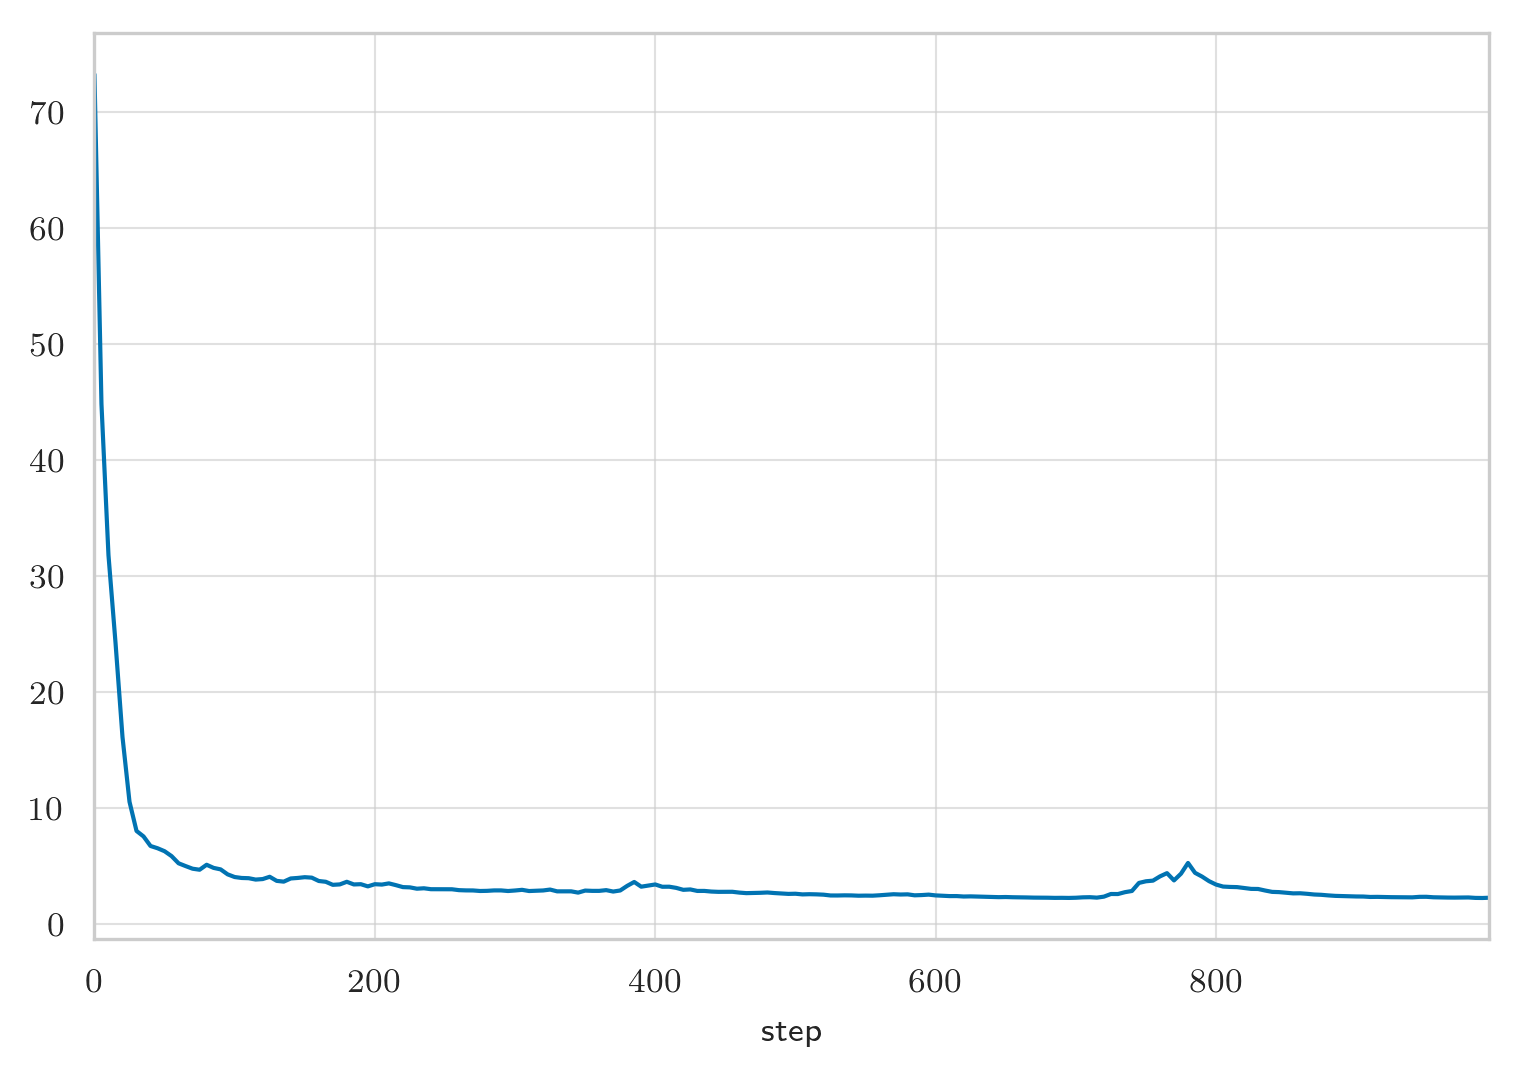

In [20]:
select_experiment_with_rmse(temp_df, 0.903950).result

## Scaling M (Natural Sound)

### Create

In [6]:
Ms = [500, 1000, 2000, 3000, 5000, 10000]

for M in Ms:
    run = execute(config_updates={
        'tag': 'natural_sound',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {},
        },
        'model': {
                'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 1500,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 500}, "max_cg_iter": 1500, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 1000}, "max_cg_iter": 1500, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": 

In [242]:

Ms = [100, 500, 1000, 2000, 3000, 5000]

for M in Ms:
    for optimize_spectral_points in [True, False]:
        run = execute(config_updates={
            'tag': 'natural_sound',
            'obj_func': {
                'name': 'NaturalSound',
                'kwargs': {},
            },
            'model': {
                'name': 'SSGP',
                'kwargs': {
                    'learning_rate': 0.1,
                    'feature_extractor_constructor': {
                        'name': 'RFFEmbedding',
                        'kwargs': {
                            'M': M,
                            'optimize_spectral_points': optimize_spectral_points
                        }
                    },
                    'n_iter': 100,
                    'max_cg_iter': 1500,
                    'precond_size': 10,
                    'use_double_precision': True,
                    'noise_lower_bound': 1e-10,
                    'use_cg': True,
                    'noise': None
                }
            }
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "SSGP", "kwargs": {"learning_rate": 0.1, "feature_extractor_constructor": {"name": "RFFEmbedding", "kwargs": {"M": 100, "optimize_spectral_points": True}}, "n_iter": 100, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "SSGP", "kwargs": {"learning_rate": 0.1, "feature_extractor_constructor": {"name": "RFFEmbedding", "kwargs": {"M": 100, "optimize_spectral_points": False}}, "n_iter": 100, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \

In [247]:
# SGPR for subset 10000
run = execute(config_updates={
    'tag': 'natural_sound',
    'obj_func': {
        'name': 'NaturalSound',
        'kwargs': {'subset_size': 10000},
    },
    'model': {
        'name': 'SGPR',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': None},
            'gp_kwargs': {'inducing_points': 5000},
            'max_cg_iter': 1500,
            'precond_size': 10,
            'use_double_precision': True,
            'noise_lower_bound': 1e-10,
            'use_cg': True,
            'noise': None
        }
    }
})

Ms = [100, 500, 1000, 2000, 3000, 5000]

for M in Ms:
    run = execute(config_updates={
        'tag': 'natural_sound',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {},
        },
        'model': {
            'name': 'SGPR',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'inducing_points': M},
                'max_cg_iter': 1500,
                'precond_size': 10,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'use_cg': True,
                'noise': None
            }
        }
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 5000}, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"name": "NaturalSound", "kwargs": {}}\' \'model={"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 100}, "max_cg_iter": 1500, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound"\' \'obj_func={"

### View

In [48]:
df = get_df()
exps_rows_df = df[df["tag"] == "natural_sound"].copy()
# Filter out n_iter=0
exps_rows_df = exps_rows_df[exps_rows_df.apply(lambda r: r.config.model.kwargs.get('n_iter', 0) > 1, axis=1)]
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
05d5d9217d716da14a1aba7cd8c8359da1d36165,NaN,None,False,{'exp_hash': '05d5d9217d716da14a1aba7cd8c8359d...,"Experiment(id=1433, name=lions)",NaturalSound,1433,SSGP,None,0a68cba3d1c33a107da8bd4346635f57e3c64691,SSGP NaturalSound,NaN,NaN,0.170803,0.043216,16.48,998.44,natural_sound
0d75327c05d4d312cfc678571d27f16876f3258b,NaN,None,False,{'exp_hash': '0d75327c05d4d312cfc678571d27f168...,"Experiment(id=1452, name=lions)",NaturalSound,1452,SGPR,None,be231c9e289846fbe8ddcd754b825d7e8fc7406d,SGPR NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169101,0.042894,46.75,6612.28,natural_sound
1458e40ededa8083776eab6ebb7525c117d70837,NaN,None,False,{'exp_hash': '1458e40ededa8083776eab6ebb7525c1...,"Experiment(id=1434, name=lions)",NaturalSound,1434,SSGP,None,38c1abad2d9b60afd039f2e77b0b2dd67b0e62a0,SSGP NaturalSound,NaN,NaN,0.161598,0.043030,25.43,1656.07,natural_sound
227a86bacab0675c4030dc3eaa0f72eef294a1ab,NaN,None,False,{'exp_hash': '227a86bacab0675c4030dc3eaa0f72ee...,"Experiment(id=1277, name=lions)",NaturalSound,1277,SSGP,None,4d3d36f437c58e3de1b4afc7911cd94eedcdb1e3,SSGP NaturalSound,NaN,NaN,0.173566,0.043167,8.97,616.42,natural_sound
2c352b694bf9e846bcb7c3c3ee89be7c6ced1a64,NaN,None,False,{'exp_hash': '2c352b694bf9e846bcb7c3c3ee89be7c...,"Experiment(id=1431, name=lions)",NaturalSound,1431,SSGP,None,4696580d1d67cc5a2c80f5d081ab4e28fe8214cc,SSGP NaturalSound,NaN,NaN,0.169193,0.043134,7.76,374.57,natural_sound
3452f7a5b94bdf4b0b9ca92ab1a87f16b8a279ba,NaN,None,False,{'exp_hash': '3452f7a5b94bdf4b0b9ca92ab1a87f16...,"Experiment(id=1280, name=lions)",NaturalSound,1280,SSGP,None,b92cab93e85031be854a3272719c1ca25dd4f15c,SSGP NaturalSound,NaN,NaN,0.170717,0.043349,24.88,1797.20,natural_sound
38ecb75c93ecc93645f109831ac105f3283dee37,NaN,None,False,{'exp_hash': '38ecb75c93ecc93645f109831ac105f3...,"Experiment(id=1287, name=lions)",NaturalSound,1287,SGPR,None,cd1c0d687a6df955b18dd38e8c6b1aa589e4528c,SGPR NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169101,0.042894,2.11,264.25,natural_sound
4085900fbc09a18d95ed8cba4568049b076f4961,NaN,None,False,{'exp_hash': '4085900fbc09a18d95ed8cba4568049b...,"Experiment(id=1432, name=lions)",NaturalSound,1432,SSGP,None,b778ac2f69057df37c3f87ba64a4e62b9e22b370,SSGP NaturalSound,NaN,NaN,0.167595,0.043235,21.00,1563.57,natural_sound
556656d43e8fbf8a7b70ffb9636be95ac2ff867b,NaN,None,False,{'exp_hash': '556656d43e8fbf8a7b70ffb9636be95a...,"Experiment(id=1284, name=lions)",NaturalSound,1284,SSGP,None,1d637df35861244386371046888d5f472c32e29b,SSGP NaturalSound,NaN,NaN,0.154654,0.045350,60.44,4114.76,natural_sound


In [271]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
temp_df['fixed'] = temp_df.apply(lambda r: not r.config.model.kwargs.feature_extractor_constructor.kwargs.get('optimize_spectral_points', False), axis=1)
view_df(temp_df, indexes=['double', 'fixed', 'model', 'M'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  result.max_err  \
double fixed model      M     f                                           
False  False SSGP       100   NaturalSound     0.042777        0.169307   
                        500   NaturalSound     0.043162        0.166209   
                        1000  NaturalSound     0.044364        0.175022   
                        2000  NaturalSound     0.043349        0.170717   
                        3000  NaturalSound     0.043918        0.170044   
                        5000  NaturalSound     0.043247        0.170096   
       True  DKLGPModel 500   NaturalSound     0.045478        0.181186   
                        1000  NaturalSound     0.047155        0.185082   
                        2000  NaturalSound     0.040725        0.151638   
                        3000  NaturalSound     0.039473        0.191035   
                        5000  NaturalSound     0.020892        0.116237   
                        10000 NaturalSound     0.023410        0.153566   
             SGPR       100   NaturalSound     0.042894        0.169101   
                        500   NaturalSound     0.042894        0.169101   
                        1000  NaturalSound     0.042894        0.169101   
             SSGP       100   NaturalSound     0.044027        0.167798   
                        500   NaturalSound     0.043167        0.173566   
                        1000  NaturalSound     0.043549        0.167244   
                        2000  NaturalSound     0.043677        0.158474   
                        3000  NaturalSound     0.044368        0.152758   
                        5000  NaturalSound     0.045350        0.154654   
True   False SSGP       100   NaturalSound     0.042996        0.169943   
                        500   NaturalSound     0.042884        0.166184   
                        1000  NaturalSound     0.043235        0.167595   
                        2000  NaturalSound     0.042715        0.167450   
       True  SGPR       100   NaturalSound     0.042894        0.169101   
                        500   NaturalSound     0.042894        0.169101   
                        1000  NaturalSound     0.042894        0.169101   
                        2000  NaturalSound     0.042894        0.169101   
                        5000  NaturalSound     0.042894        0.169101   
             SSGP       100   NaturalSound     0.043134        0.169193   
                        500   NaturalSound     0.043216        0.170803   
                        1000  NaturalSound     0.043030        0.161598   
                        2000  NaturalSound     0.043815        0.173515   

                                            result.time:training  
double fixed model      M     f                                   
False  False SSGP       100   NaturalSound                237.66  
                        500   NaturalSound                613.30  
                        1000  NaturalSound                936.45  
                        2000  NaturalSound               1797.20  
                        3000  NaturalSound               2529.07  
                        5000  NaturalSound               4226.55  
       True  DKLGPModel 500   NaturalSound                642.81  
                        1000  NaturalSound                516.38  
                        2000  NaturalSound                578.22  
                        3000  NaturalSound                567.00  
                        5000  NaturalSound                629.82  
                        10000 NaturalSound                757.55  
             SGPR       100   NaturalSound                264.25  
                        500   NaturalSound                724.31  
                        1000  NaturalSound               1630.45  
             SSGP       100   NaturalSound                230.48  
                        500   NaturalSound                616.42  
                        1000  NaturalSound                991.94  
   

In [43]:
# add result.rmse.std row.
# make new row
mean = 0.0444123123
std = 0.012
f"{mean:.3f} ± {std:.4f}"

# SSGP
# SSGP-fixed

'0.044 ± 0.0120'

{'exp_hash': '0d75327c05d4d312cfc678571d27f16876f3258b',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'gp_kwargs': {'inducing_points': 2000},
                      'learning_rate': 0.1,
                      'max_cg_iter': 1500,
                      'n_iter': 100,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'noise_lower_bound': 1e-10,
                      'precond_size': 10,
                      'use_cg': True,
                      'use_double_precision': True},
           'name': 'SGPR'},
 'model_compare': False,
 'model_hash': 'be231c9e289846fbe8ddcd754b825d7e8fc7406d',
 'obj_func': {'kwargs': {}, 'name': 'NaturalSound'},
 'seed': 215049265,
 'tag': 'natural_sound',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



Experiment(id=1452, name=lions)

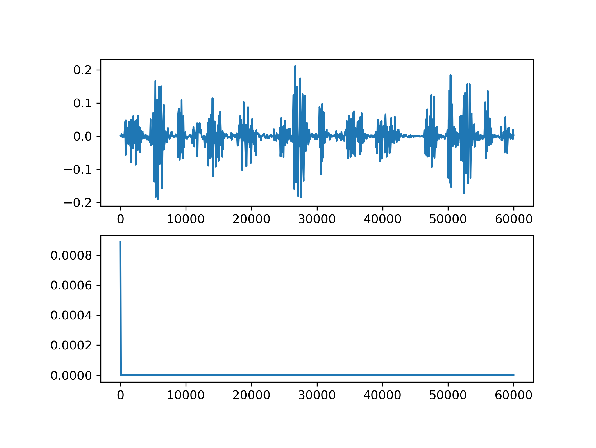

In [267]:
select_experiment_with_rmse(temp_df, 0.042894)

### Figures

In [104]:
# Add mean and std
temp_df2 = exps_rows_df.copy()
temp_df2['M'] = temp_df2.apply(get_M, axis=1)
temp_df2 = aggregate_results(temp_df2, describe=True)

temp_df['result.rmse.mean'] = temp_df2[('result.rmse', 'mean')]
temp_df['result.rmse.std'] = temp_df2[('result.rmse', 'std')]

name_mapping = {
    'DKLGPModel': 'KISS-GP',
    'SGPR': 'SGPR',
    'SSGP': 'SSGP'
}

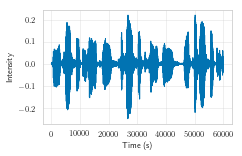

In [110]:
f = NaturalSound()
fig, ax = plt.subplots()
ax.plot(f.X_train, f.Y_train)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Intensity')
savefig(fig, 'scalable/scalability-varying-M-dataset.pdf')

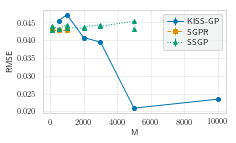

In [105]:
latexify(columns=2)

full_df = temp_df

markers = cycle_markers()
lines = cycle_lines()


fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model']):
    model_df = model_df.sort_values('M')
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']
    ax.errorbar(model_df['M'], mean, yerr=err, label=name_mapping[idx], marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('M')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-M.pdf')

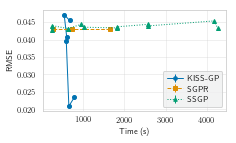

In [106]:
latexify(columns=2)

full_df = temp_df

markers = cycle_markers()
lines = cycle_lines()

fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model']):
    model_df = model_df.sort_values('M')
    time = model_df['result.time:training'] + model_df['result.time:pred']
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']

    ax.errorbar(time, mean, yerr=err, label=name_mapping[idx], marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-M-time.pdf')

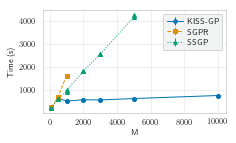

In [107]:
latexify(columns=2)

full_df = temp_df

markers = cycle_markers()
lines = cycle_lines()

fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model']):
    model_df = model_df.sort_values('M')
    time = model_df['result.time:training'] + model_df['result.time:pred']
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']

    ax.errorbar(model_df['M'], time, yerr=err, label=name_mapping[idx], marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('M')
    ax.set_ylabel('Time (s)')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-M-time-vs-M.pdf')

## Scaling N (Natural Sound)

### Create

In [264]:
Ms = [10000, 15000, 20000]
Ns = [59309]

for M in Ms:
    for N in Ns:
        for double in [True, False]:
            run = execute(config_updates={
                'tag': 'natural_sound-N',
                'obj_func': {
                    'name': 'NaturalSound',
                    'kwargs': {'subset_size': N},
                },
                'model': {
                    'name': 'DKLGPModel',
                    'kwargs': {
                        'learning_rate': 0.1,
                        'n_iter': 200,
                        'nn_kwargs': {'layers': None},
                        'gp_kwargs': {'n_grid': M},
                        'max_cg_iter': 3000,
                        'precond_size': 10,
                        'use_double_precision': double,
                        'noise_lower_bound': 1e-10 if double else 1e-4,
                        'use_cg': True,
                        'noise': None
                    }
                }
            })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 59309}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_double_precision": True, "noise_lower_bound": 1e-10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 59309}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_double_precision": False, "noise_lower_bound": 0.0001, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural

In [142]:
M = 10000
Ns = [1000, 5000, 10000, 30000, 59309]

for N in Ns:
    run = execute(config_updates={
        'tag': 'natural_sound-N',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'use_cg': True,
                'noise': None
            }
        }
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 1000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 5000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 10000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwar

In [122]:
# ExactGP
Ns = [1000, 5000, 10000, 30000, 59309]

for N in Ns:
    run = execute(config_updates={
        'tag': 'natural_sound-N',
        'obj_func': {
            'name': 'NaturalSound',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None
            }
        }
    })


['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 1000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 5000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers

In [205]:
# ExactGP
run = execute(config_updates={
    'tag': 'natural_sound-N',
    'obj_func': {
        'name': 'NaturalSound',
        'kwargs': {'subset_size': 10000},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': None},
            'use_cg': False,
            'use_double_precision': True,
            'noise_lower_bound': 1e-10,
            'noise': None
        }
    }
})

run = execute(config_updates={
    'tag': 'natural_sound-N',
    'obj_func': {
        'name': 'NaturalSound',
        'kwargs': {'subset_size': 10000},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': None},
            'max_cg_iter': 3000,
            'precond_size': 10,
            'use_cg': True,
            'use_double_precision': True,
            'noise_lower_bound': 1e-10,
            'noise': None
        }
    }
})

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "use_cg": False, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="natural_sound-N"\' \'obj_func={"name": "NaturalSound", "kwargs": {"subset_size": 10000}}\' \'model={"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}\'']


### View

In [272]:
df = get_df()
exps_rows_df = df[df["tag"] == "natural_sound-N"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
1e9c843c4410f9195fd8f910e327681fd26a6d29,30000.0,None,False,{'exp_hash': '1e9c843c4410f9195fd8f910e327681f...,"Experiment(id=1360, name=lions)",NaturalSound,1360,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.182612,0.027528,17.63,1209.50,natural_sound-N
1e9c843c4410f9195fd8f910e327681fd26a6d29,30000.0,None,False,{'exp_hash': '1e9c843c4410f9195fd8f910e327681f...,"Experiment(id=1327, name=lions)",NaturalSound,1327,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.150653,0.026769,16.01,1273.60,natural_sound-N
23f0aa4a9ed4ff8e801b779b9102bf5f3928e246,1000.0,None,False,{'exp_hash': '23f0aa4a9ed4ff8e801b779b9102bf5f...,"Experiment(id=1324, name=lions)",NaturalSound,1324,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.176104,0.041344,6.45,654.80,natural_sound-N
23f0aa4a9ed4ff8e801b779b9102bf5f3928e246,1000.0,None,False,{'exp_hash': '23f0aa4a9ed4ff8e801b779b9102bf5f...,"Experiment(id=1358, name=lions)",NaturalSound,1358,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169117,0.042825,6.73,712.96,natural_sound-N
2e9b44c2506f143720940821e061de6aaee00255,10000.0,None,False,{'exp_hash': '2e9b44c2506f143720940821e061de6a...,"Experiment(id=1330, name=lions)",NaturalSound,1330,DKLGPModel,None,ba5a551557bc98bcda7f1042f4daf8481c4ae785,DKLGPModel NaturalSound,{'training': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.148654,0.040137,7.14,3214.07,natural_sound-N
3afa59514162fd98377cf472fb34cc0edd988561,10000.0,None,False,{'exp_hash': '3afa59514162fd98377cf472fb34cc0e...,"Experiment(id=1361, name=lions)",NaturalSound,1361,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.169435,0.038957,11.81,936.61,natural_sound-N
3afa59514162fd98377cf472fb34cc0edd988561,10000.0,None,False,{'exp_hash': '3afa59514162fd98377cf472fb34cc0e...,"Experiment(id=1325, name=lions)",NaturalSound,1325,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.148888,0.034246,10.43,866.56,natural_sound-N
3d6ce01e9396c3f8d13aa0f55f9d5a703527d5bb,59309.0,None,False,{'exp_hash': '3d6ce01e9396c3f8d13aa0f55f9d5a70...,"Experiment(id=1362, name=lions)",NaturalSound,1362,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.146529,0.022713,24.44,1520.67,natural_sound-N
3d6ce01e9396c3f8d13aa0f55f9d5a703527d5bb,59309.0,None,False,{'exp_hash': '3d6ce01e9396c3f8d13aa0f55f9d5a70...,"Experiment(id=1328, name=lions)",NaturalSound,1328,DKLGPModel,None,d876e01b7dc8a8c5333bea777382608adba3b23b,DKLGPModel NaturalSound,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.146679,0.022721,23.33,1571.86,natural_sound-N


In [273]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['double', 'model', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  result.max_err  \
double model      M       N       f                                           
False  DKLGPModel 10000.0 1000.0  NaturalSound     0.042084        0.172610   
                          5000.0  NaturalSound     0.041756        0.172869   
                          10000.0 NaturalSound     0.036602        0.159162   
                          30000.0 NaturalSound     0.027149        0.166633   
                          59309.0 NaturalSound     0.022717        0.146604   
                                  NaturalSound     0.022711        0.146487   
                  15000.0 59309.0 NaturalSound     0.008696        0.063544   
                  20000.0 59309.0 NaturalSound     0.036554        0.182045   
                  NaN     1000.0  NaturalSound     0.043150        0.170115   
                                  NaturalSound     0.043405        0.169891   
                          5000.0  NaturalSound     0.041166        0.164584   
                                  NaturalSound     0.042556        0.177594   
                          10000.0 NaturalSound     0.040137        0.148654   
                                  NaturalSound     0.040196        0.150852   
True   DKLGPModel 10000.0 59309.0 NaturalSound     0.021477        0.129090   
                  15000.0 59309.0 NaturalSound     0.008850        0.070352   
                  20000.0 59309.0 NaturalSound     0.035474        0.186655   
                  NaN     10000.0 NaturalSound     0.025723        0.139930   
                                  NaturalSound     0.025102        0.138197   

                                                result.time:training  
double model      M       N       f                                   
False  DKLGPModel 10000.0 1000.0  NaturalSound            683.880000  
                          5000.0  NaturalSound            840.465000  
                          10000.0 NaturalSound            901.585000  
                          30000.0 NaturalSound           1241.550000  
                          59309.0 NaturalSound           1546.265000  
                                  NaturalSound           1607.170000  
                  15000.0 59309.0 NaturalSound           1761.140000  
                  20000.0 59309.0 NaturalSound           2154.580000  
                  NaN     1000.0  NaturalSound             78.530000  
                                  NaturalSound             42.010000  
                          5000.0  NaturalSound           1076.550000  
                                  NaturalSound            947.310000  
                          10000.0 NaturalSound           3214.070000  
                                  NaturalSound           5091.580000  
True   DKLGPModel 10000.0 59309.0 NaturalSound           1815.110000  
                  15000.0 59309.0 NaturalSound           1961.430000  
                  20000.0 59309.0 NaturalSound           2586.560000  
                  NaN     10000.0 NaturalSound          24202.208333  
                                  NaturalSound           1209.221667

{'exp_hash': 'cc21331e09372d91dec831972c23c70ab9d834aa',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'gp_kwargs': {'n_grid': 15000},
                      'learning_rate': 0.1,
                      'max_cg_iter': 3000,
                      'n_iter': 200,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'noise_lower_bound': 0.0001,
                      'precond_size': 10,
                      'use_cg': True,
                      'use_double_precision': False},
           'name': 'DKLGPModel'},
 'model_compare': False,
 'model_hash': 'b53870db40146f31908536a56cb999881b83fc55',
 'obj_func': {'kwargs': {'subset_size': 59309}, 'name': 'NaturalSound'},
 'seed': 977359119,
 'tag': 'natural_sound-N',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[10.978240013122559]],
   'dtype': 'float32'},
  'noise': 0.00010988378926413134,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 0.0023806169629096985,
   'dtype': 'float32'}},
 'max_err': 0.0635438715917104,
 'rmse': 0.008696219439991926,
 'time:pred': 31.069999999999936,
 'time:training': 1761.1399999999999}

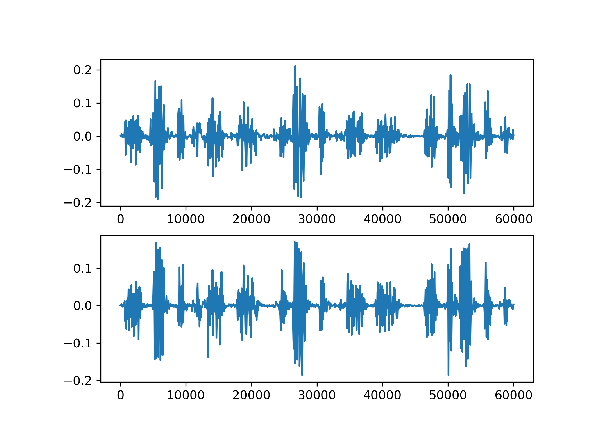

In [275]:
select_experiment_with_rmse(temp_df, 0.008696).result

{'exp_hash': '3d6ce01e9396c3f8d13aa0f55f9d5a703527d5bb',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'gp_kwargs': {'n_grid': 10000},
                      'learning_rate': 0.1,
                      'max_cg_iter': 3000,
                      'n_iter': 200,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'precond_size': 10,
                      'use_cg': True},
           'name': 'DKLGPModel'},
 'model_compare': False,
 'model_hash': 'd876e01b7dc8a8c5333bea777382608adba3b23b',
 'obj_func': {'kwargs': {'subset_size': 59309}, 'name': 'NaturalSound'},
 'seed': 885470509,
 'tag': 'natural_sound-N',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[0.6931472420692444]],
   'dtype': 'float32'},
  'noise': 0.00011145226017106324,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 0.0016022808849811554,
   'dtype': 'float32'}},
 'max_err': 0.14667870531501706,
 'rmse': 0.022720625563595196,
 'time:pred': 23.330000000000155,
 'time:training': 1571.86}

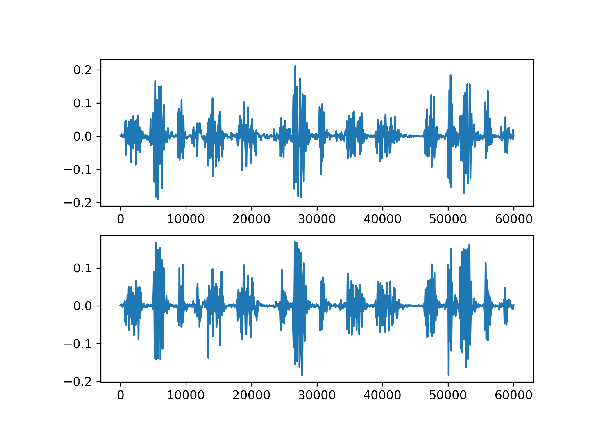

In [233]:
select_experiment_with_rmse(temp_df, 0.022717).result

### Figures

In [90]:
# Add mean and std
temp_df2 = exps_rows_df.copy()
temp_df2['M'] = temp_df2.apply(get_M, axis=1)
temp_df2 = aggregate_results(temp_df2, describe=True)

temp_df['result.rmse.mean'] = temp_df2[('result.rmse', 'mean')]
temp_df['result.rmse.std'] = temp_df2[('result.rmse', 'std')]

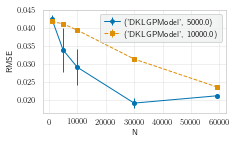

In [91]:
latexify(columns=2)
markers = cycle_markers()
lines = cycle_lines()

full_df = temp_df

fig, ax = plt.subplots()

for idx, model_df in full_df.groupby(['model', 'M']):
    model_df = model_df.sort_values('N')
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']
    #ax.plot(model_df['N'], mean, label=idx, marker=next(markers))
    ax.errorbar(model_df['N'], mean, yerr=err, label=idx, marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('N')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-N.pdf')

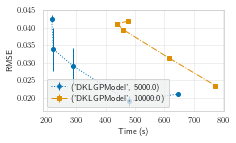

In [92]:
latexify(columns=2)
full_df = temp_df

markers = cycle_markers()

fig, ax = plt.subplots()
for idx, model_df in full_df.groupby(['model', 'M']):
    model_df = model_df.sort_values('N')
    time = model_df['result.time:training'] + model_df['result.time:pred']
    mean = model_df['result.rmse.mean']
    err = 2 * model_df['result.rmse.std']
    ax.errorbar(time, mean, yerr=err, label=idx, marker=next(markers), linestyle=next(lines))
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('RMSE')

ax.legend()

plt.tight_layout()
savefig(fig, 'scalable/scalability-varying-N-time.pdf')

In [ ]:
# H1: Observe the drop around 19200. When it perfectly aligns with the observations. Biased!

# Inducing points...

## 2D smooth

### Create

In [206]:
# Try double with added noise
Ns = [100]
Ms = [100]

kissmodels = lambda N, M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'eval_cg_tolerance': 1e-5,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
            }
        }
    }
}
    
# Run KISS-GP
for N in Ns:
    for M in Ms:
        run = execute(config_updates={
            'tag': 'scalable-smooth',
            'obj_func': {
                'name': 'Branin',
                'kwargs': {'noise': 5}
            },
            'model': kissmodels(N, M),
            'gp_samples': N ** 2,
            #'use_sample_grid': True,
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin", "kwargs": {"noise": 5}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "eval_cg_tolerance": 1e-05, "use_double_precision": True, "noise_lower_bound": 1e-10}}}}\' \'gp_samples=10000\'']


In [259]:
Ns = [32]
Ms = [100]

kissmodels = lambda N, M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
# Run KISS-GP
for N in Ns:
    for M in Ms:
        run = execute(config_updates={
            'tag': 'scalable-smooth',
            'obj_func': {
                'name': 'Branin',
            },
            'model': kissmodels(N, M),
            'gp_samples': N ** 2,
            #'use_sample_grid': True,
        })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 200, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "eval_cg_tolerance": 1e-05}}}}\' \'gp_samples=1024\'']


In [ ]:
Ns = [10, 32, 50, 100, 140]
Ms = [100, 140, 200]

kissmodels = lambda N, M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
# Run KISS-GP
for N in Ns:
    for M in Ms:
        run = execute(config_updates={
            'tag': 'scalable-smooth',
            'obj_func': {
                'name': 'Branin',
            },
            'model': kissmodels(N, M),
            'gp_samples': N ** 2,
            #'use_sample_grid': True,
        })

In [154]:
# CG with GPyTorch

Ns = [10, 32, 50, 100]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
for N in Ns:
    run = execute(config_updates={
        'tag': 'scalable-smooth',
        'obj_func': {
            'name': 'Branin',
        },
        'model': gp,
        'gp_samples': N ** 2,
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\' \'gp_samples=100\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\' \'g

In [155]:
# exactGP with GPyTorch

Ns = [10, 32, 50, 100]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'use_cg': False,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
            }
        }
    }
}

for N in Ns:
    run = execute(config_updates={
        'tag': 'scalable-smooth',
        'obj_func': {
            'name': 'Branin',
        },
        'model': gp,
        'gp_samples': N ** 2,
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10}}}}\' \'gp_samples=100\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10}}}}\' \'gp_samples=1024\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"

In [156]:
# SGPR 

M = 1000
Ns = [10, 32, 50, 100]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'SGPR',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 10,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'inducing_points': M},
                'max_cg_iter': 3000,
                'precond_size': 10,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-10,
                'eval_cg_tolerance': 1e-5,
            }
        }
    }
}
    
for N in Ns:
    run = execute(config_updates={
        'tag': 'scalable-smooth',
        'obj_func': {
            'name': 'Branin',
        },
        'model': gp,
        'gp_samples': N ** 2,
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 1000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\' \'gp_samples=100\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="scalable-smooth"\' \'obj_func={"name": "Branin"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 10, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 1000}, "max_cg_iter": 3000, "precond_size": 10, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-10, "eval_cg_tolerance": 1e-05}}}}\'

### View

In [260]:
df = get_df()
exps_rows_df = df[df["tag"] == "scalable-smooth"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,name,result.WARNING,result.hyperparameters,result.max_err,result.rmse,result.time:pred,result.time:training,tag
exp_hash,,,,,,,,,,,,,,,,,,
07b37aee9bfa261900cd66843c6322c2d30bbd16,100.0,None,False,{'exp_hash': '07b37aee9bfa261900cd66843c6322c2...,"Experiment(id=1315, name=lions)",Branin,1315,N<DKLGPModel>,None,3ebab13cc0ae39814346b9b7692bdc20ce3b240f,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",8.616459e+00,1.165918,0.11,2.00,scalable-smooth
0ad8e6b72880d1908b3880e67a04adb6705161ed,100.0,None,False,{'exp_hash': '0ad8e6b72880d1908b3880e67a04adb6...,"Experiment(id=1349, name=lions)",Branin,1349,N<DKLGPModel>,None,a7dfa0e6e2332ade387e90726302fc90f8276c4c,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.265131e+01,1.207607,0.09,1.82,scalable-smooth
0b1bb135cb3a3d9d286e7c487ae73e790883f044,10000.0,None,False,{'exp_hash': '0b1bb135cb3a3d9d286e7c487ae73e79...,"Experiment(id=1373, name=lions)",Branin,1373,N<DKLGPModel>,None,7a27abe42d9eb3f1d3653381cee9547c26af6400,N<DKLGPModel> Branin,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",3.859844e+05,120242.055071,207.57,1056.99,scalable-smooth
0b7c69191847ef6b6edfd1e70da97c1d4bac474b,100.0,None,False,{'exp_hash': '0b7c69191847ef6b6edfd1e70da97c1d...,"Experiment(id=1337, name=lions)",Branin,1337,N<DKLGPModel>,None,7c42a68fc34a948b33d0ec1d681de24bc10a45e1,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.424440e+01,6.866274,9.76,531.78,scalable-smooth
0d5c6b500626d7a4980dc5742f9232e8da270da4,1024.0,None,False,{'exp_hash': '0d5c6b500626d7a4980dc5742f9232e8...,"Experiment(id=1299, name=lions)",Branin,1299,N<DKLGPModel>,None,fb8b2aa93ad2f8310bb4c5c758ad48fc6a1a06b7,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.898606e+00,0.392870,16.92,98.37,scalable-smooth
0e4aed49465fc30b517c65ff81afa947801512c6,2500.0,None,False,{'exp_hash': '0e4aed49465fc30b517c65ff81afa947...,"Experiment(id=1302, name=lions)",Branin,1302,N<DKLGPModel>,None,fb8b2aa93ad2f8310bb4c5c758ad48fc6a1a06b7,N<DKLGPModel> Branin,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.218800e+00,0.412104,66.21,129.47,scalable-smooth
19e4bdbdf6669b737062f53bcb292c6d403a84fb,10000.0,None,False,{'exp_hash': '19e4bdbdf6669b737062f53bcb292c6d...,"Experiment(id=1306, name=lions)",Branin,1306,N<DKLGPModel>,None,121664d3c54511ea1cd104b3402cc5abb87836f5,N<DKLGPModel> Branin,{'pred': True},"{'lengthscale': {'py/object': 'numpy.ndarray',...",4.633428e-01,0.101938,197.98,348.74,scalable-smooth
1b582ecaf251fcbdca006946c92305163a227d4b,100.0,None,False,{'exp_hash': '1b582ecaf251fcbdca006946c9230516...,"Experiment(id=1334, name=lions)",Branin,1334,N<DKLGPModel>,None,1ed9a847537dc1b2f67a23d5109c9b0c78a1fb94,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",1.825482e+01,8.897630,1.79,62.13,scalable-smooth
1b974c18747c738149c9d9d74327d8c7673ecb69,10000.0,None,False,{'exp_hash': '1b974c18747c738149c9d9d74327d8c7...,"Experiment(id=1379, name=lions)",Branin,1379,N<DKLGPModel>,None,c54a2f5da8a3c2b37116264f2e704aaf106854c9,N<DKLGPModel> Branin,NaN,"{'lengthscale': {'py/object': 'numpy.ndarray',...",9.579924e-02,0.017246,32.09,1094.26,scalable-smooth


In [261]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    return r.config.model.kwargs.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['noise'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.get('noise', None), axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
temp_df['n_iter'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('n_iter', False), axis=1)
temp_df['CG'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_cg', False), axis=1)
temp_df['grid'] = temp_df.apply(lambda r: r.config.get('use_sample_grid', False), axis=1)
view_df(temp_df, indexes=['noise', 'double', 'n_iter', 'model', 'grid', 'M', 'CG', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training', 'result.time:pred']).sort_index()

result.rmse  \
noise double n_iter model         grid  M     CG    N       f                       
5.0   True   100    N<DKLGPModel> False 100.0 True  10000.0 Branin     104.206670   
NaN   False  50     N<DKLGPModel> False 50.0  True  100.0   Branin       6.127022   
                                                    1024.0  Branin       0.392870   
                                                    2500.0  Branin       0.412104   
                                                    10000.0 Branin       0.237181   
                                                    19600.0 Branin       0.120388   
                                        100.0 True  100.0   Branin       2.699344   
                                                    1024.0  Branin       0.363375   
                                                    2500.0  Branin       0.242419   
                                                    10000.0 Branin       0.101938   
                                                    19600.0 Branin       0.090640   
                                        140.0 True  100.0   Branin       2.352232   
                                                    1024.0  Branin       0.553134   
                                                    2500.0  Branin       0.192435   
                                                    10000.0 Branin       0.115474   
                                                    19600.0 Branin       0.093410   
                                        NaN   False 100.0   Branin       1.165918   
                                                    1024.0  Branin       0.393304   
                                                    2500.0  Branin       0.195813   
                                                    10000.0 Branin       0.087791   
                                              True  100.0   Branin       1.151866   
                                                    1024.0  Branin       0.380937   
                                                    2500.0  Branin       0.198093   
                                                    10000.0 Branin       0.188321   
             100    N<DKLGPModel> False 100.0 True  10000.0 Branin  101679.037397   
      True   50     N<DKLGPModel> False 50.0  True  100.0   Branin       8.897630   
                                                    1024.0  Branin       1.423461   
                                                    2500.0  Branin       0.226603   
                                                    10000.0 Branin       0.082546   
                                        100.0 True  100.0   Branin      12.353100   
...                                                                           ...   
                                        140.0 True  100.0   Branin       6.866274   
                                                    1024.0  Branin       0.509020   
                                                    2500.0  Branin       0.207778   
                                                    10000.0 Branin       0.093983   
                                        NaN   False 100.0   Branin       1.042638   
                                                    1024.0  Branin       0.396851   
                                                    2500.0  Branin       0.212265   
                                                    10000.0 Branin       0.082278   
                                              True  100.0   Branin       1.207607   
                                                    1024.0  Branin       0.401179   
                                                    2500.0  Branin       0.176610   
                                                    10000.0 Branin       0.085506   
             100    N<DKLGPModel> False 100.0 True  100.0   Branin       1.868952   
                                                    1024.0  Branin       0.362919   
                                                    2500.0  Branin  116155.

{'exp_hash': '19e4bdbdf6669b737062f53bcb292c6d403a84fb',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 100},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 50,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'precond_size': 10,
                                           'use_cg': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '121664d3c54511ea1cd104b3402cc5abb87836f5',
 'obj_func': {'name': 'Branin'},
 'seed': 886693704,
 'tag': 'scalable-smooth',
 'verbosity': {'bo_show_iter': 30, 'plot': Fals

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.4087018966674805, 0.8830283880233765]],
  'dtype': 'float32'},
 'noise': 0.005595929455012083,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 3.918612480163574,
  'dtype': 'float32'}}

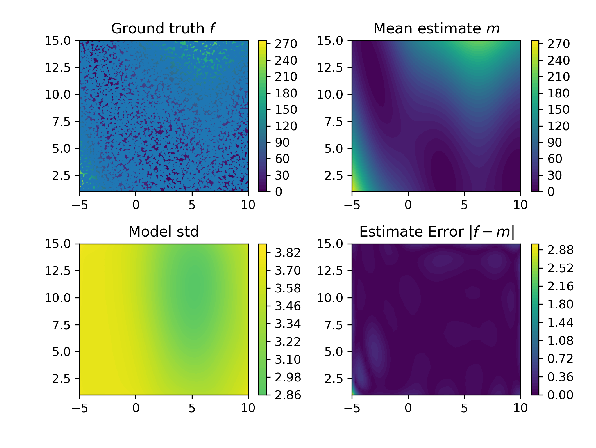

In [214]:
exp = select_experiment_with_rmse(temp_df, 0.101938)
exp.result['hyperparameters']

{'exp_hash': '58806e6938bfb15fb35481c08c41be743ce2dbcf',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 100},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 100,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'precond_size': 10,
                                           'use_cg': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': 'a5f36f3965863ca249a5edd85e13f35e29c406df',
 'obj_func': {'name': 'Branin'},
 'seed': 910804746,
 'tag': 'scalable-smooth',
 'verbosity': {'bo_show_iter': 30, 'plot': Fal

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.8929831981658936, 0.29730162024497986]],
  'dtype': 'float32'},
 'noise': 0.0015558928716927767,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 3.836301326751709,
  'dtype': 'float32'}}

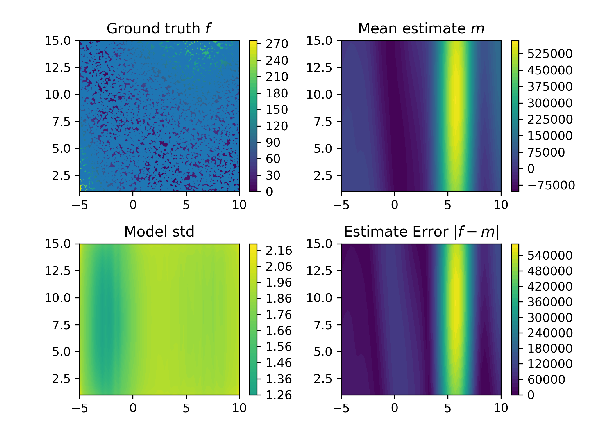

In [213]:
exp = select_experiment_with_rmse(temp_df, 101679.037397)
exp.result['hyperparameters']

{'exp_hash': '6a0fd4cb234612a3c9fc0203f5c7ac0c75a9d65b',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 140},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 50,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'noise_lower_bound': 1e-10,
                                           'precond_size': 10,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '7c42a68fc34a948b33d0ec1d68

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.4234239813530025, 0.8880291250933462]],
  'dtype': 'float64'},
 'noise': 0.00546954151435403,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 4.360226449770031,
  'dtype': 'float64'}}

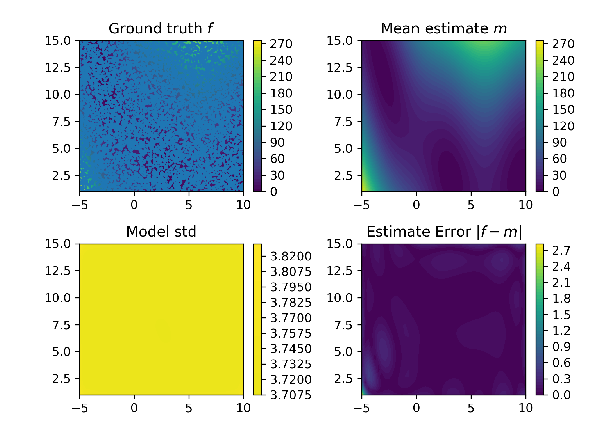

In [191]:
exp = select_experiment_with_rmse(temp_df, 0.093983)
exp.result['hyperparameters']
#exp.metrics['DKLGPModel.training.loss'].plot()


{'exp_hash': '0b1bb135cb3a3d9d286e7c487ae73e790883f044',
 'gp_samples': 10000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-05,
                                           'gp_kwargs': {'n_grid': 140},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 3000,
                                           'n_iter': 100,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'noise_lower_bound': 1e-10,
                                           'precond_size': 10,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '7a27abe42d9eb3f1d3653381c

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[4.1703322569216805, 1.0206230750199647]],
  'dtype': 'float64'},
 'noise': 2.977149600649006e-05,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 3.199482738277898,
  'dtype': 'float64'}}

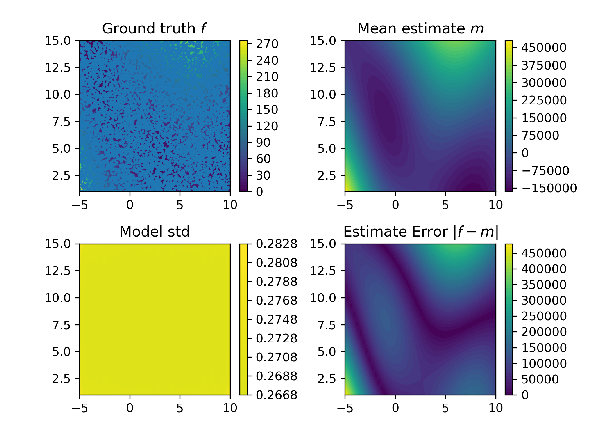

In [190]:
exp = select_experiment_with_rmse(temp_df, 120242.055071)
exp.result['hyperparameters']
#exp.metrics['DKLGPModel.training.loss'].plot()

In [ ]:
# Is 20000 => 8h reasonable?

# GPModel slow on server
# DKLGPModel sends warnings only on server
# DKLGPModel is slow in server

# DKLGPModel does not have good performance... Test performance and speed
    # Run GPytorch: CG, Exact
    # 

# Plot computational space
# Genz 1,2,3, branin, increasingoscillation
# Heston
# SSGP

# Financial

## Heston (scalability)

### Create

In [40]:
settings.SERVER_DEST = 'epfl'
#settings.WALLTIME = '00:40'
#settings.QUEUE = 'gputitanxpascal'
#settings.EXTRA = ''

Ns = [10, 32, 50]
    
gp = lambda N: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'use_cg': True,
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'noise': None
            }
        }
    }
}

models = [gp]

for model in models:
    for N in Ns:
        run = execute(config_updates={
            'tag': 'heston',
            'obj_func': {
                'name': 'HestonOptionPricer',
                'kwargs': {'noise': 0.01}
            },
            'model': model(N),
            'gp_samples': N,
            'use_sample_grid': True,
        })


['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="heston"\' \'obj_func={"name": "HestonOptionPricer", "kwargs": {"noise": 0.01}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": True, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "noise": None}}}}\' \'gp_samples=10\' \'use_sample_grid=True\'']
b'Submitted batch job 67489\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="heston"\' \'obj_func={"name": "HestonOptionPricer", "kwargs": {"noise": 0.01}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": True, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "noise": None}}}}\

In [41]:
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '05:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

Ns = [150, 180]

gp = {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'use_cg': True,
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'noise': None
            }
        }
    }
}

for model in [gp]:
    for N in Ns:
        run = execute(config_updates={
            'tag': 'heston',
            'obj_func': {
                'name': 'HestonOptionPricer',
                'kwargs': {'noise': 0.01}
            },            'model': model,
            'gp_samples': N,
            'use_sample_grid': True,
        })

source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="heston"\x27 \x27obj_func={"name": "HestonOptionPricer", "kwargs": {"noise": 0.01}}\x27 \x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": True, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "noise": None}}}}\x27 \x27gp_samples=150\x27 \x27use_sample_grid=True\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/05:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="heston"\\x27 \\x27obj_func={"name": "HestonOptionPricer", "kwargs": {"noise": 0.01}}\\x27 \\x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"l

In [42]:
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '10:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

for N in [150, 200, 250]:
    run = execute(config_updates={
        'tag': 'heston',
        'obj_func': {
            'name': 'HestonOptionPricer',
        },
        'gp_samples': N,
        'use_sample_grid': True,

        'model': {
            'name': 'SGPR',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 100,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'inducing_points': 1024},
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                'use_cg': True,
                'noise': None
            }
        }
    })

    for optimize_spectral_points in [True, False]:
        run = execute(config_updates={
            'tag': 'heston',
            'obj_func': {
                'name': 'HestonOptionPricer',
            },
            'gp_samples': N,
            'use_sample_grid': True,

            'model': {
                'name': 'SSGP',
                'kwargs': {
                    'learning_rate': 0.1,
                    'feature_extractor_constructor': {
                        'name': 'RFFEmbedding',
                        'kwargs': {
                            'M': 2048,
                            'optimize_spectral_points': optimize_spectral_points
                        }
                    },
                    'n_iter': 100,
                    'max_cg_iter': 30000,
                    'precond_size': 50,
                    'use_double_precision': True,
                    'use_cg': True,
                    'noise': None
                }
            }
        })


source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="heston"\x27 \x27obj_func={"name": "HestonOptionPricer"}\x27 \x27gp_samples=150\x27 \x27use_sample_grid=True\x27 \x27model={"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 1024}, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "use_cg": True, "noise": None}}\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/10:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="heston"\\x27 \\x27obj_func={"name": "HestonOptionPricer"}\\x27 \\x27gp_samples=150\\x27 \\x27use_sample_grid=True\\x27 \\x27model={"name": "SGPR", "kwargs": {"learning_rate": 0.1, "n_iter": 100, "nn_kwargs": {"layers": None}, "gp_kwargs": {"inducing_points": 

b'Job <3030105> is submitted to queue <gpuv100>.\n'
source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="heston"\x27 \x27obj_func={"name": "HestonOptionPricer"}\x27 \x27gp_samples=250\x27 \x27use_sample_grid=True\x27 \x27model={"name": "SSGP", "kwargs": {"learning_rate": 0.1, "feature_extractor_constructor": {"name": "RFFEmbedding", "kwargs": {"M": 2048, "optimize_spectral_points": True}}, "n_iter": 100, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "use_cg": True, "noise": None}}\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/10:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="heston"\\x27 \\x27obj_func={"name": "HestonOptionPricer"}\\x27 \\x27gp_samples=250\\x27 \\x27use_sample_grid=True\\x27 \\x27model={"name": "SSGP", "kwargs": {"lea

In [43]:
# exactGP for large N (compare time with KISS-GP and accuracy)
# KISS-GP for large N
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '10:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

Ns = [150, 200, 250]

kissmodels = lambda M: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': M},
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'train_eval_cg_tolerance': 0.01,
                'use_cg': True,
                'noise': None
            }
        }
    }
}

for model in [kissmodels(70), kissmodels(100)]:
    for N in Ns:
        run = execute(config_updates={
            'tag': 'heston',
            'obj_func': {
                'name': 'HestonOptionPricer',
                'kwargs': {'noise': 0.01}
            },            
            'model': model,
            'gp_samples': N,
            'use_sample_grid': True,
        })

source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="heston"\x27 \x27obj_func={"name": "HestonOptionPricer", "kwargs": {"noise": 0.01}}\x27 \x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 70}, "max_cg_iter": 30000, "precond_size": 50, "use_double_precision": True, "train_eval_cg_tolerance": 0.01, "use_cg": True, "noise": None}}}}\x27 \x27gp_samples=150\x27 \x27use_sample_grid=True\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/10:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="heston"\\x27 \\x27obj_func={"name": "HestonOptionPricer", "kwargs": {"noise": 0.01}}\\x27 \\x27model={"name": "NormalizerModel", "kwargs": {"model": {"nam

b'Job <3030113> is submitted to queue <gpuv100>.\n'


In [52]:
Ns = [10, 32, 50, 100, 140]
    
gp = lambda N: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'use_cg': False,
                'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'noise': None
            }
        }
    }
}

kissmodels = lambda N: {
    'name': 'NormalizerModel',
    'kwargs': {
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 150,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': N},
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                #'noise_lower_bound': 1e-10,
                'use_cg': True,
                'noise': None
            }
        }
    }
}

models = [gp, kissmodels]

for model in models:
    for N in Ns:
        run = execute(config_updates={
            'tag': 'heston',
            'obj_func': {
                'name': 'HestonOptionPricer',
            },
            'model': model(N),
            'gp_samples': N,
            'use_sample_grid': True,
        })

for d in range(1,10):
    run = execute(config_updates={
        'tag': 'heston',
        'obj_func': {
            'name': 'HestonOptionPricer',
        },
        'model': {
            'name': 'AdaptiveSparseGrid',
            'kwargs': dict(
                depth=d, 
                refinement_level=0,
                f_tol=1e-3,
            )
        },
    })

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="heston"\' \'obj_func={"name": "HestonOptionPricer"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}}}\' \'gp_samples=10\' \'use_sample_grid=True\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="heston"\' \'obj_func={"name": "HestonOptionPricer"}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 150, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": None}, "use_cg": False, "use_double_precision": True, "noise_lower_bound": 1e-10, "noise": None}}}}\' \'gp_samples=32\' \'use_sample_grid=True\'']
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.

KeyboardInterrupt: 

### View

In [54]:
df = get_df()
exps_rows_df = df[df["tag"] == "heston"].copy()
exps_rows_df = exps_rows_df[exps_rows_df['id'] > 1000]
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.max_err,result.mll,result.mnlp,result.nmse,result.pmll,result.rmse,result.time:pred,result.time:training,status,tag
exp_hash,,,,,,,,,,,,,,,,,,,,,
001bdb06464497ad3c1145a0df4166a05bc4cfae,50.0,None,False,{'exp_hash': '001bdb06464497ad3c1145a0df4166a0...,"Experiment(id=2057, name=lions)",HestonOptionPricer,2057,N<DKLGPModel>,None,d9ede11ba066eda06702773d0e59de810f37b463,...,0.000280,NaN,-1.712533e+04,0.000002,NaN,0.000060,0.65,126.22,COMPLETED,heston
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1251, name=lions)",HestonOptionPricer,1251,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,0.038383,NaN,NaN,NaN,NaN,0.006546,0.03,0.22,COMPLETED,heston
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1263, name=lions)",HestonOptionPricer,1263,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,0.038383,NaN,NaN,NaN,NaN,0.006546,0.02,0.21,COMPLETED,heston
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1081, name=lions)",HestonOptionPricer,1081,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,0.038383,NaN,NaN,NaN,NaN,0.006546,0.02,0.23,COMPLETED,heston
0bd61df966663e6f730c364547028afb853acb98,150.0,None,False,{'exp_hash': '0bd61df966663e6f730c364547028afb...,"Experiment(id=2038, name=lions)",HestonOptionPricer,2038,N<DKLGPModel>,None,d9ede11ba066eda06702773d0e59de810f37b463,...,0.000171,NaN,-1.716909e+04,0.000002,NaN,0.000049,0.65,70.86,COMPLETED,heston
0bd61df966663e6f730c364547028afb853acb98,150.0,None,False,{'exp_hash': '0bd61df966663e6f730c364547028afb...,"Experiment(id=2037, name=lions)",HestonOptionPricer,2037,N<DKLGPModel>,None,d9ede11ba066eda06702773d0e59de810f37b463,...,0.000172,NaN,-1.716905e+04,0.000002,NaN,0.000050,0.65,70.68,COMPLETED,heston
12b4e4821b92a88b9844cb32642feb72402d0bdb,140.0,None,False,{'exp_hash': '12b4e4821b92a88b9844cb32642feb72...,"Experiment(id=1249, name=lions)",HestonOptionPricer,1249,N<DKLGPModel>,None,f0a235a7e138303c413aa093a770dd7296ce74f0,...,0.000419,NaN,NaN,NaN,NaN,0.000159,194.54,22499.83,COMPLETED,heston
160133393b9c5cbb83eb0d9a2a8ae87941236fed,150.0,None,False,{'exp_hash': '160133393b9c5cbb83eb0d9a2a8ae879...,"Experiment(id=2059, name=lions)",HestonOptionPricer,2059,N<DKLGPModel>,None,a58493d766cfc0a85688f8c4ab4734f40c1fafb1,...,0.000249,NaN,-1.713557e+04,0.000001,NaN,0.000043,3.41,137.89,COMPLETED,heston
17b28e53f52525e938ab1fed1b67180882f7f125,150.0,None,False,{'exp_hash': '17b28e53f52525e938ab1fed1b671808...,"Experiment(id=2049, name=lions)",HestonOptionPricer,2049,N<DKLGPModel>,None,ea66fc97e6dd267e168dda29ffed101d53573821,...,0.182209,NaN,1.703919e+07,0.728873,NaN,0.055807,847.92,145.87,COMPLETED,heston


In [55]:
def get_M(r):
    SS_M = r.config.model.kwargs.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    return r.config.model.kwargs.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = exps_rows_df
#temp_df = aggregate_results(temp_df)
temp_df['M'] = exps_rows_df.apply(get_M, axis=1)
temp_df['CG'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_cg', False), axis=1)
temp_df['CG_iter'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('max_cg_iter', 1000), axis=1)
temp_df['PCG'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('precond_size', 10), axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
temp_df['t_tol'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('train_eval_cg_tolerance', 1.0), axis=1)
temp_df['f.n'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.get('noise', 0), axis=1)

temp_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.time:training,status,tag,M,CG,CG_iter,PCG,double,t_tol,f.n
exp_hash,,,,,,,,,,,,,,,,,,,,,
001bdb06464497ad3c1145a0df4166a05bc4cfae,50.0,None,False,{'exp_hash': '001bdb06464497ad3c1145a0df4166a0...,"Experiment(id=2057, name=lions)",HestonOptionPricer,2057,N<DKLGPModel>,None,d9ede11ba066eda06702773d0e59de810f37b463,...,126.22,COMPLETED,heston,NaN,True,30000,50,True,1.000,0.00
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1251, name=lions)",HestonOptionPricer,1251,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,0.22,COMPLETED,heston,NaN,False,1000,10,False,1.000,0.00
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1263, name=lions)",HestonOptionPricer,1263,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,0.21,COMPLETED,heston,NaN,False,1000,10,False,1.000,0.00
02d48d6fd4aa9299a6d8087767dd31b56bc952ab,NaN,None,False,{'exp_hash': '02d48d6fd4aa9299a6d8087767dd31b5...,"Experiment(id=1081, name=lions)",HestonOptionPricer,1081,AdaptiveSparseGrid,None,343eb7677405c3b446a70733706f28ef97e6e053,...,0.23,COMPLETED,heston,NaN,False,1000,10,False,1.000,0.00
0bd61df966663e6f730c364547028afb853acb98,150.0,None,False,{'exp_hash': '0bd61df966663e6f730c364547028afb...,"Experiment(id=2038, name=lions)",HestonOptionPricer,2038,N<DKLGPModel>,None,d9ede11ba066eda06702773d0e59de810f37b463,...,70.86,COMPLETED,heston,NaN,True,30000,50,True,1.000,0.00
0bd61df966663e6f730c364547028afb853acb98,150.0,None,False,{'exp_hash': '0bd61df966663e6f730c364547028afb...,"Experiment(id=2037, name=lions)",HestonOptionPricer,2037,N<DKLGPModel>,None,d9ede11ba066eda06702773d0e59de810f37b463,...,70.68,COMPLETED,heston,NaN,True,30000,50,True,1.000,0.00
12b4e4821b92a88b9844cb32642feb72402d0bdb,140.0,None,False,{'exp_hash': '12b4e4821b92a88b9844cb32642feb72...,"Experiment(id=1249, name=lions)",HestonOptionPricer,1249,N<DKLGPModel>,None,f0a235a7e138303c413aa093a770dd7296ce74f0,...,22499.83,COMPLETED,heston,140.0,True,1500,10,False,1.000,0.00
160133393b9c5cbb83eb0d9a2a8ae87941236fed,150.0,None,False,{'exp_hash': '160133393b9c5cbb83eb0d9a2a8ae879...,"Experiment(id=2059, name=lions)",HestonOptionPricer,2059,N<DKLGPModel>,None,a58493d766cfc0a85688f8c4ab4734f40c1fafb1,...,137.89,COMPLETED,heston,70.0,True,30000,50,True,0.010,0.00
17b28e53f52525e938ab1fed1b67180882f7f125,150.0,None,False,{'exp_hash': '17b28e53f52525e938ab1fed1b671808...,"Experiment(id=2049, name=lions)",HestonOptionPricer,2049,N<DKLGPModel>,None,ea66fc97e6dd267e168dda29ffed101d53573821,...,145.87,COMPLETED,heston,70.0,True,30000,50,True,1.000,0.00


In [56]:
view_df(temp_df, indexes=['f.n', 'double', 'CG', 'CG_iter', 'PCG', 'model', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training', 'result.time:pred']).sort_index()

result.rmse  \
f.n  double CG    CG_iter PCG model              M     N     f                                 
0.00 False  False 1000    10  AdaptiveSparseGrid NaN   NaN   HestonOptionPricer     0.006546   
                                                             HestonOptionPricer     0.006546   
                                                             HestonOptionPricer     0.006546   
                                                             HestonOptionPricer     0.000361   
                                                             HestonOptionPricer     0.000361   
                                                             HestonOptionPricer     0.000361   
                                                             HestonOptionPricer     0.004169   
                                                             HestonOptionPricer     0.004169   
                                                             HestonOptionPricer     0.004169   
                                                             HestonOptionPricer     0.001198   
                                                             HestonOptionPricer     0.001198   
                                                             HestonOptionPricer     0.001198   
                              N<DKLGPModel>      NaN   10.0  HestonOptionPricer     0.000169   
                                                       32.0  HestonOptionPricer     0.000073   
                                                       50.0  HestonOptionPricer     0.000063   
                              N<GPModel>         NaN   10.0  HestonOptionPricer     0.000070   
                  1500    10  N<DKLGPModel>      NaN   10.0  HestonOptionPricer     0.000169   
                                                       32.0  HestonOptionPricer     0.000074   
                                                       50.0  HestonOptionPricer     0.000061   
            True  1000    10  N<DKLGPModel>      20.0  10.0  HestonOptionPricer     0.000166   
                                                 64.0  32.0  HestonOptionPricer     0.010254   
                                                 100.0 50.0  HestonOptionPricer     0.003109   
                                                 200.0 100.0 HestonOptionPricer     0.000415   
                  1500    10  N<DKLGPModel>      10.0  10.0  HestonOptionPricer     0.000297   
                                                 32.0  32.0  HestonOptionPricer     0.047414   
                                                 50.0  50.0  HestonOptionPricer     0.000290   
                                                 70.0  150.0 HestonOptionPricer     0.083457   
                                                       200.0 HestonOptionPricer     0.073864   
                                                             HestonOptionPricer     0.060661   
                                                       250.0 HestonOptionPricer     0.057144   
...                                                                                      ...   
                  30000   50  N<DKLGPModel>      NaN   50.0  HestonOptionPricer     0.000080   
     True   False 1000    10  N<DKLGPModel>      NaN   10.0  HestonOptionPricer     0.000071   
                                                             HestonOptionPricer     0.000071   
                                                       32.0  HestonOptionPricer     0.000029   
                                                             HestonOptionPricer     0.000029   
                                                       50.0  HestonOptionPricer     0.000022   
                                                             HestonOptionPricer     0.000022   
                                                       100.0 HestonOptionPricer     0.000014   
                                                             HestonOptionPricer     0.000014   
            True  1500    10  N<DKLGPModel>      

In [ ]:
# Issues:
# Main problem: we're not getting lower than 0.00001 error (N=100 with cholesky).
    # Achieve this with KISS-GP (increase tolerance)
# Get SSGP working
# Make CG as good as Cholesky
# Lower tolerance (training and test time ratio)

# Why is 70 failing and not 100?:
# 70 150 is failing
# 100 150 fails

# 150 exactGP better than 200 KISS-GP

# exactGP:
# How is 150 exactGP faster than 100?
# Cholesky still better

# KISS-GP:
# 150 prediction much cheaper than 100
# No difference between 150-200

{'exp_hash': '78a919762e3af1db81bd55af898821ee537538c3',
 'gp_samples': 150,
 'gp_use_derivatives': False,
 'gpu': True,
 'model': {'kwargs': {'model': {'kwargs': {'gp_kwargs': {'n_grid': 100},
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 30000,
                                           'n_iter': 150,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'precond_size': 50,
                                           'train_eval_cg_tolerance': 0.01,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'}},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '4c2708473bcda9a2048c38f0ad2b69fcc4debca8',
 'obj_func': {'kwargs': {'noise': 0

{'hyperparameters': {'lengthscale': {'py/object': 'numpy.ndarray',
   'values': [[2.506615797609868, 1.9013083808364546]],
   'dtype': 'float64'},
  'noise': 0.06215748595803944,
  'outputscale': {'py/object': 'numpy.ndarray',
   'values': 2.7097812283823455,
   'dtype': 'float64'}},
 'mae': 0.008016004553011088,
 'max_err': 0.03673462036448072,
 'mnlp': -7961.49864980561,
 'nmse': 0.06563504349811428,
 'rmse': 0.01001621573849643,
 'time:pred': 3.3799999999999955,
 'time:training': 130.09999999999997}

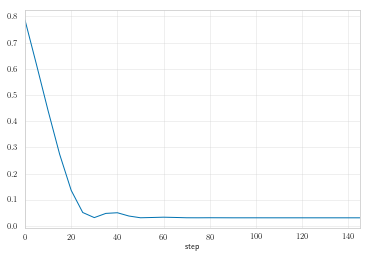

In [59]:
exp = select_experiment_with_rmse(temp_df, 0.010016)
exp.result

## Growth Model

In [ ]:
# SG
# AS-GP
# DKL

## FORTRAN

### Create

In [84]:
# Linear
run = execute(config_updates={
    'tag': 'EconomicModel',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'LinearFromFeatureExtractor',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 300,
            'nn_kwargs': {'layers': [100,50,5]},
        }
    },
    'gp_samples': 100
})

WARNING - lions - No observers have been added to this run
INFO - lions - Running command 'main'
INFO - lions - Started
INFO - main - Model0: LinearFromFeatureExtractor training on 1080 of dim 12


Iter 1/300 - Loss: 0.765
Iter 21/300 - Loss: 0.016
Iter 41/300 - Loss: 0.001
Iter 61/300 - Loss: 0.001
Iter 81/300 - Loss: 0.000
Iter 101/300 - Loss: 0.000
Iter 121/300 - Loss: 0.000
Iter 141/300 - Loss: 0.000
Iter 161/300 - Loss: 0.000
Iter 181/300 - Loss: 0.000
Iter 201/300 - Loss: 0.000
Iter 221/300 - Loss: 0.000
Iter 241/300 - Loss: 0.000
Iter 261/300 - Loss: 0.000
Iter 281/300 - Loss: 0.000


INFO - main - Model0: LinearFromFeatureExtractor predicting on 120 of dim 12
INFO - main - Model0: LinearFromFeatureExtractor has RMSE=0.004706227937094899 max_err=0.0150092353820801
INFO - lions - Result: {'rmse': 0.004706227937094899, 'max_err': 0.0150092353820801, 'time:training': 4.2969819999998435, 'time:pred': 0.005265999999892301}
INFO - lions - Completed after 0:00:01


In [85]:
# BLR
run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'DNNBLR',
        'kwargs': {
            'do_pretrain': True,
            'pretrain_n_iter': 100,
            'learning_rate': 0.1,
            'n_iter': 100,
            'nn_kwargs': {'layers': [100, 50, 5]},
            'max_cg_iter': 3000,
            'precond_size': 10,
            'use_cg': True,
            'noise': None,
            #'use_double_precision': True,
            #'noise_lower_bound': 1e-8
        }
    },
    'gp_samples': 100
}))

WARNING - lions - No observers have been added to this run
INFO - lions - Running command 'main'
INFO - lions - Started
INFO - main - Model0: NormalizerModel training on 1080 of dim 12


Iter 1/100 - Loss: 1.582
Iter 21/100 - Loss: 0.008
Iter 41/100 - Loss: 0.004
Iter 61/100 - Loss: 0.002
Iter 81/100 - Loss: 0.001
training on 1080 data points of dim 12
Current hyperparameters: {'variance': tensor([[0.6931]], grad_fn=<SoftplusBackward>), 'noise': 0.6932471990585327}
Iter 1/100 - Loss: 0.745
Iter 21/100 - Loss: -0.110
Current hyperparameters: {'variance': tensor([[0.0726]], grad_fn=<SoftplusBackward>), 'noise': 0.04469484090805054}
Iter 41/100 - Loss: -1.132
Current hyperparameters: {'variance': tensor([[0.0567]], grad_fn=<SoftplusBackward>), 'noise': 0.0021247139666229486}
Iter 61/100 - Loss: -2.043
Iter 81/100 - Loss: -2.669
Current hyperparameters: {'variance': tensor([[0.0449]], grad_fn=<SoftplusBackward>), 'noise': 0.00029474147595465183}


INFO - main - Model0: NormalizerModel predicting on 120 of dim 12
INFO - main - Model0: NormalizerModel has RMSE=0.001972458140643051 max_err=0.0056232248748625535
INFO - lions - Result: {'rmse': 0.001972458140643051, 'max_err': 0.0056232248748625535, 'time:training': 20.38582099999985, 'time:pred': 0.10910400000011578}
INFO - lions - Completed after 0:00:03


predicting 120 points using 1080 training points


In [152]:
%matplotlib inline

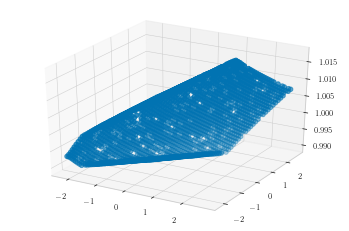

In [153]:
model = run.interactive_stash.model
X = model.X
Y = model.Y
Z = model.get_features(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[..., 0], Z[..., 1], Y)

In [ ]:
settings.MODE = settings.MODES.LOCAL
D = 8
run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel2',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': D, 'output_policy': 1},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 150,
            'nn_kwargs': {'layers': [100, 50, D]},
            'max_cg_iter': 100000,
            'precond_size': 10,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            'noise_lower_bound': 1e-8
        }
    }
}))


In [5]:
settings.SERVER_DEST = 'epfl' # 'dtu' or 'epfl'
#settings.WALLTIME = '02:00'
#settings.QUEUE = 'hpc' #gputitanxpascal

run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel4',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 2000,
            'nn_kwargs': {'layers': [100, 50, 2], 'output_activation': True},
            'gp_kwargs': {
                'kernel': {'name': 'MaternKernel'}
            },
            'verbose': False,
            'max_cg_iter': 30000,
            'precond_size': 20,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            'noise_lower_bound': 1e-8,
            'train_eval_cg_tolerance': 1e-4,
            'eval_cg_tolerance': 1e-6,
        }
    }
}))

run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel4',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 2000,
            'nn_kwargs': {'layers': [1000, 50, 2], 'output_activation': True},
            'gp_kwargs': {
                'kernel': {'name': 'MaternKernel'}
            },
            'verbose': False,
            'max_cg_iter': 30000,
            'precond_size': 20,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            'noise_lower_bound': 1e-8,
            'train_eval_cg_tolerance': 1e-4,
            'eval_cg_tolerance': 1e-6,
        }
    }
}))

run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel4',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.02,
            'n_iter': 2000,
            'nn_kwargs': {'layers': [1000, 50, 2], 'output_activation': True},
            'gp_kwargs': {
                'kernel': {'name': 'MaternKernel'}
            },
            'verbose': False,
            'max_cg_iter': 30000,
            'precond_size': 20,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            'noise_lower_bound': 1e-8,
            'train_eval_cg_tolerance': 1e-4,
            'eval_cg_tolerance': 1e-6,
        }
    }
}))

run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel4',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 500,
            'nn_kwargs': {'layers': None},
            'gp_kwargs': {
                'kernel': {'name': 'MaternKernel'}
            },
            'verbose': False,
            'max_cg_iter': 30000,
            'precond_size': 20,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            'noise_lower_bound': 1e-8,
            'train_eval_cg_tolerance': 1e-4,
            'eval_cg_tolerance': 1e-6,
        }
    }
}))

run = execute(config_updates=normalize_config({
    'tag': 'EconomicModel4',
    'obj_func': {
        'name': 'EconomicModel',
        'kwargs': {'D': 12, 'output_policy': 1},
    },
    'model': {
        'name': 'DKLGPModel',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 2000,
            'nn_kwargs': {'layers': None},
            'gp_kwargs': {
                'kernel': {'name': 'MaternKernel'}
            },
            'verbose': False,
            'max_cg_iter': 30000,
            'precond_size': 20,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            'noise_lower_bound': 1e-8,
            'train_eval_cg_tolerance': 1e-4,
            'eval_cg_tolerance': 1e-6,
        }
    }
}))

['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel4"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 12, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 2000, "nn_kwargs": {"layers": [100, 50, 2], "output_activation": True}, "gp_kwargs": {"kernel": {"name": "MaternKernel"}}, "verbose": False, "max_cg_iter": 30000, "precond_size": 20, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-08, "train_eval_cg_tolerance": 0.0001, "eval_cg_tolerance": 1e-06}}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 71467\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel4"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 12, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs":

In [73]:
settings.MODE = settings.MODES.SERVER
                                                                                                         
# DKL pretrained (early stopping with validation...)
# DKL (+ KISS-GP)
# GP
# DNN + BLR
# (SG would not work)

Ds = [2, 4, 8, 12, 20]

for D in Ds:
    # LASSO
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'LASSO',
        }
    }))

    # Linear
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'LinearFromFeatureExtractor',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 300,
                'nn_kwargs': {'layers': [100,50,5]},
            }
        }
    }))

    # BLR
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DNNBLR',
            'kwargs': {
                'do_pretrain': False,
                #'pretrain_n_iter': 200,
                'learning_rate': 0.1,
                'n_iter': 400,
                'nn_kwargs': {'layers': [100, 50, 50]},
                'max_cg_iter': 30000,
                'precond_size': 20,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-8,
                'train_eval_cg_tolerance': 1e-4,
                'eval_cg_tolerance': 1e-6,
            }
        }
    }))
    
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 400,
                'nn_kwargs': {'layers': [100, 50, 5]},
                'max_cg_iter': 30000,
                'precond_size': 20,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-8,
                'train_eval_cg_tolerance': 1e-4,
                'eval_cg_tolerance': 1e-6,
            }
        }
    }))

    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 400,
                'nn_kwargs': {'layers': [100, 50, D]},
                'max_cg_iter': 30000,
                'precond_size': 20,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-8,
                'train_eval_cg_tolerance': 1e-4,
                'eval_cg_tolerance': 1e-6,
            }
        }
    }))

    # GP
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 500,
                'nn_kwargs': {'layers': None},
                'max_cg_iter': 30000,
                'precond_size': 20,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-8,
                'train_eval_cg_tolerance': 1e-4,
                'eval_cg_tolerance': 1e-6,
            }
        }
    }))

    # Matern
    run = execute(config_updates=normalize_config({
        'tag': 'EconomicModel2',
        'obj_func': {
            'name': 'EconomicModel',
            'kwargs': {'D': D, 'output_policy': 1},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 500,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {
                    'kernel': {'name': 'MaternKernel'}
                },
                'max_cg_iter': 30000,
                'precond_size': 20,
                'use_cg': True,
                'noise': None,
                'use_double_precision': True,
                'noise_lower_bound': 1e-8,
                'train_eval_cg_tolerance': 1e-4,
                'eval_cg_tolerance': 1e-6,
            }
        }
    }))


['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 2, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LASSO"}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 69425\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 2, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LinearFromFeatureExtractor", "kwargs": {"learning_rate": 0.1, "n_iter": 300, "nn_kwargs": {"layers": [100, 50, 5]}}}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 69426\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 2, "output_policy": 1}}\' \'model={"name": "Nor

b'Submitted batch job 69439\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 4, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "gp_kwargs": {"kernel": {"name": "MaternKernel"}}, "max_cg_iter": 30000, "precond_size": 20, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-08, "train_eval_cg_tolerance": 0.0001, "eval_cg_tolerance": 1e-06}}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 69440\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 8, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LASSO"}, "normalize_input": True, "normalize_ou

b'Submitted batch job 69454\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 12, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "max_cg_iter": 30000, "precond_size": 20, "use_cg": True, "noise": None, "use_double_precision": True, "noise_lower_bound": 1e-08, "train_eval_cg_tolerance": 0.0001, "eval_cg_tolerance": 1e-06}}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 69455\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="EconomicModel2"\' \'obj_func={"name": "EconomicModel", "kwargs": {"D": 12, "output_policy": 1}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": None}, "gp_

### View

In [7]:
exps_rows_df = get_df(**{'config.tag': 'EconomicModel4'})
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.hyperparameters,result.mae,result.max_err,result.mnlp,result.nmse,result.rmse,result.time:pred,result.time:training,status,tag
exp_hash,,,,,,,,,,,,,,,,,,,,,
524117bc5f1b5f96ae8ba40dcf1d1515fce1ce0a,None,None,False,{'exp_hash': '524117bc5f1b5f96ae8ba40dcf1d1515...,"Experiment(id=2492, name=lions)",EconomicModel12,2492,N<DKLGPModel>,None,2813dee4350b09167d399ab656bdab4370413879,...,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000880,0.004145,3420.613831,0.000119,0.001149,0.17,741.27,COMPLETED,EconomicModel4
7bd38266e58e9c4ba5fed82041f1b23b3a85c0bf,None,None,False,{'exp_hash': '7bd38266e58e9c4ba5fed82041f1b23b...,"Experiment(id=2491, name=lions)",EconomicModel12,2491,N<DKLGPModel>,None,87b2a5f5e9804a94d3a54cf6ec7622da38b54fde,...,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000897,0.003650,-488.364521,0.000118,0.001143,0.14,758.14,COMPLETED,EconomicModel4
975a4ea1409e621834a5ddf184ce0d6266709943,None,None,False,{'exp_hash': '975a4ea1409e621834a5ddf184ce0d62...,"Experiment(id=2490, name=lions)",EconomicModel12,2490,N<DKLGPModel>,None,29a8668df85f5d4f133733778cbda6b84a74c5f5,...,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000871,0.003263,250.902791,0.000113,0.001120,0.20,729.87,COMPLETED,EconomicModel4
ccc4f4bfe384d3faef126a60656d108d5a0eb064,None,None,False,{'exp_hash': 'ccc4f4bfe384d3faef126a60656d108d...,"Experiment(id=2494, name=lions)",EconomicModel12,2494,N<DKLGPModel>,None,9f4aefc265d5ba5630218beb4c575517ccc4fdc5,...,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000860,0.003547,-616.811884,0.000113,0.001119,1.74,781.42,COMPLETED,EconomicModel4
e65d81a3328a8894e14b5b09d447c7ae3ebebb66,None,None,False,{'exp_hash': 'e65d81a3328a8894e14b5b09d447c7ae...,"Experiment(id=2493, name=lions)",EconomicModel12,2493,N<DKLGPModel>,None,52792609b3a4e251516bf08c7c2bc8bf8dcbbc36,...,"{'lengthscale': {'py/object': 'numpy.ndarray',...",0.000903,0.003799,-625.203517,0.000126,0.001180,1.06,188.94,COMPLETED,EconomicModel4


In [8]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_result_std(exps_rows_df, col='result.rmse')

temp_df['n_iter'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.get('n_iter'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)
temp_df['kernel'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.gp_kwargs.kernel.get('name', 'RBFKernel'), axis=1)

temp_df['t_tol'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.get('train_eval_cg_tolerance', 1.0), axis=1)

temp_df['f.D'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.D, axis=1)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['model', 'layers', 'kernel', 'n_iter', 'M', 'double', 't_tol'], cols=['result.rmse.describe']).sort_index()


AttributeError: 'float' object has no attribute '2e'

In [9]:
def get_M(r):
    SS_M = r.config.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = aggregate_results(exps_rows_df)

temp_df['n_iter'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.get('n_iter'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)
temp_df['kernel'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.gp_kwargs.kernel.get('name', 'RBFKernel'), axis=1)
temp_df['norm'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('normalize_output', True), axis=1)
temp_df['t_tol'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.get('train_eval_cg_tolerance', 1.0), axis=1)
temp_df['act'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('activation', 'relu'), axis=1)

temp_df['f.D'] = temp_df.apply(lambda r: r.config.obj_func.kwargs.D, axis=1)
temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['f.D', 'model', 'layers', 'kernel', 'n_iter', 'M', 'double', 'norm', 't_tol', 'act'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()


result.rmse  \
f.D model         layers        kernel       n_iter M   double norm t_tol  act  f                              
12  N<DKLGPModel> ()            MaternKernel 500    NaN True   True 0.0001 relu EconomicModel12     0.001180   
                                             2000   NaN True   True 0.0001 relu EconomicModel12     0.001119   
                  (100, 50, 2)  MaternKernel 2000   NaN True   True 0.0001 relu EconomicModel12     0.001120   
                  (1000, 50, 2) MaternKernel 2000   NaN True   True 0.0001 relu EconomicModel12     0.001149   
                                                                                EconomicModel12     0.001143   

                                                                                                 result.max_err  \
f.D model         layers        kernel       n_iter M   double norm t_tol  act  f                                 
12  N<DKLGPModel> ()            MaternKernel 500    NaN True   True 0.0001 relu EconomicModel12        0.003799   
                                             2000   NaN True   True 0.0001 relu EconomicModel12        0.003547   
                  (100, 50, 2)  MaternKernel 2000   NaN True   True 0.0001 relu EconomicModel12        0.003263   
                  (1000, 50, 2) MaternKernel 2000   NaN True   True 0.0001 relu EconomicModel12        0.004145   
                                                                                EconomicModel12        0.003650   

                                                                                                 result.time:training  
f.D model         layers        kernel       n_iter M   double norm t_tol  act  f                                      
12  N<DKLGPModel> ()            MaternKernel 500    NaN True   True 0.0001 relu EconomicModel12                188.94  
                                             2000   NaN True   True 0.0001 relu EconomicModel12                781.42  
                  (100, 50, 2)  MaternKernel 2000   NaN True   True 0.0001 relu EconomicModel12                729.87  
                  (1000, 50, 2) MaternKernel 2000   NaN True   True 0.0001 relu EconomicModel12                741.27  
                                                                                EconomicModel12                758.14

{'exp_hash': '524117bc5f1b5f96ae8ba40dcf1d1515fce1ce0a',
 'gp_use_derivatives': False,
 'gpu': False,
 'model': {'kwargs': {'model': {'kwargs': {'eval_cg_tolerance': 1e-06,
                                           'gp_kwargs': {'kernel': {'name': 'MaternKernel'}},
                                           'learning_rate': 0.02,
                                           'max_cg_iter': 30000,
                                           'n_iter': 2000,
                                           'nn_kwargs': {'layers': [1000,
                                                                    50,
                                                                    2],
                                                         'output_activation': True},
                                           'noise': None,
                                           'noise_lower_bound': 1e-08,
                                           'precond_size': 20,
                                           'trai

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[13.563490017240673, 12.665952653292301]],
  'dtype': 'float64'},
 'noise': 1.4966336147344114e-06,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 6.743078630477813,
  'dtype': 'float64'}}

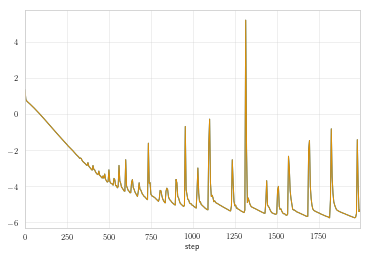

In [18]:
exp = select_experiment_with_rmse(temp_df, 0.001149)
exp.metrics['DKLGPModel.training.loss'].plot()
exp.result['hyperparameters']

{'exp_hash': '1133eb8bf0b1114a26f3005cc87f8dc88afd07f2',
 'gp_use_derivatives': False,
 'gpu': False,
 'model': {'kwargs': {'model': {'kwargs': {'do_pretrain': False,
                                           'eval_cg_tolerance': 1e-06,
                                           'learning_rate': 0.1,
                                           'max_cg_iter': 30000,
                                           'n_iter': 400,
                                           'nn_kwargs': {'activation': 'tanh',
                                                         'layers': [100,
                                                                    50,
                                                                    50]},
                                           'noise': None,
                                           'noise_lower_bound': 1e-08,
                                           'precond_size': 20,
                                           'train_eval_cg_tolerance': 0.0001,
      

{'noise': 0.0014138197966195312,
 'variance': {'py/reduce': [{'py/function': 'torch._utils._rebuild_tensor_v2'},
   {'py/tuple': [{'py/reduce': [{'py/function': 'torch.storage._load_from_bytes'},
       {'py/tuple': [{'py/b64': 'gAKKCmz8nEb5IGqoUBkugAJN6QMugAJ9cQAoWBAAAABwcm90b2NvbF92ZXJzaW9ucQFN6QNYDQAA\nAGxpdHRsZV9lbmRpYW5xAohYCgAAAHR5cGVfc2l6ZXNxA31xBChYBQAAAHNob3J0cQVLAlgDAAAA\naW50cQZLBFgEAAAAbG9uZ3EHSwR1dS6AAihYBwAAAHN0b3JhZ2VxAGN0b3JjaApEb3VibGVTdG9y\nYWdlCnEBWAgAAAA3NjE1MDY3MnECWAMAAABjcHVxA0sBTnRxBFEugAJdcQBYCAAAADc2MTUwNjcy\ncQFhLgEAAAAAAAAAsO4wNQ2HRj8=\n'}]},
       None,
       None,
       None]},
     0,
     {'py/tuple': [1, 1]},
     {'py/tuple': [1, 1]},
     True,
     {'py/reduce': [{'py/type': 'collections.OrderedDict'},
       {'py/tuple': []},
       None,
       None,
       {'py/tuple': []}]}]},
   None,
   None,
   None]}}

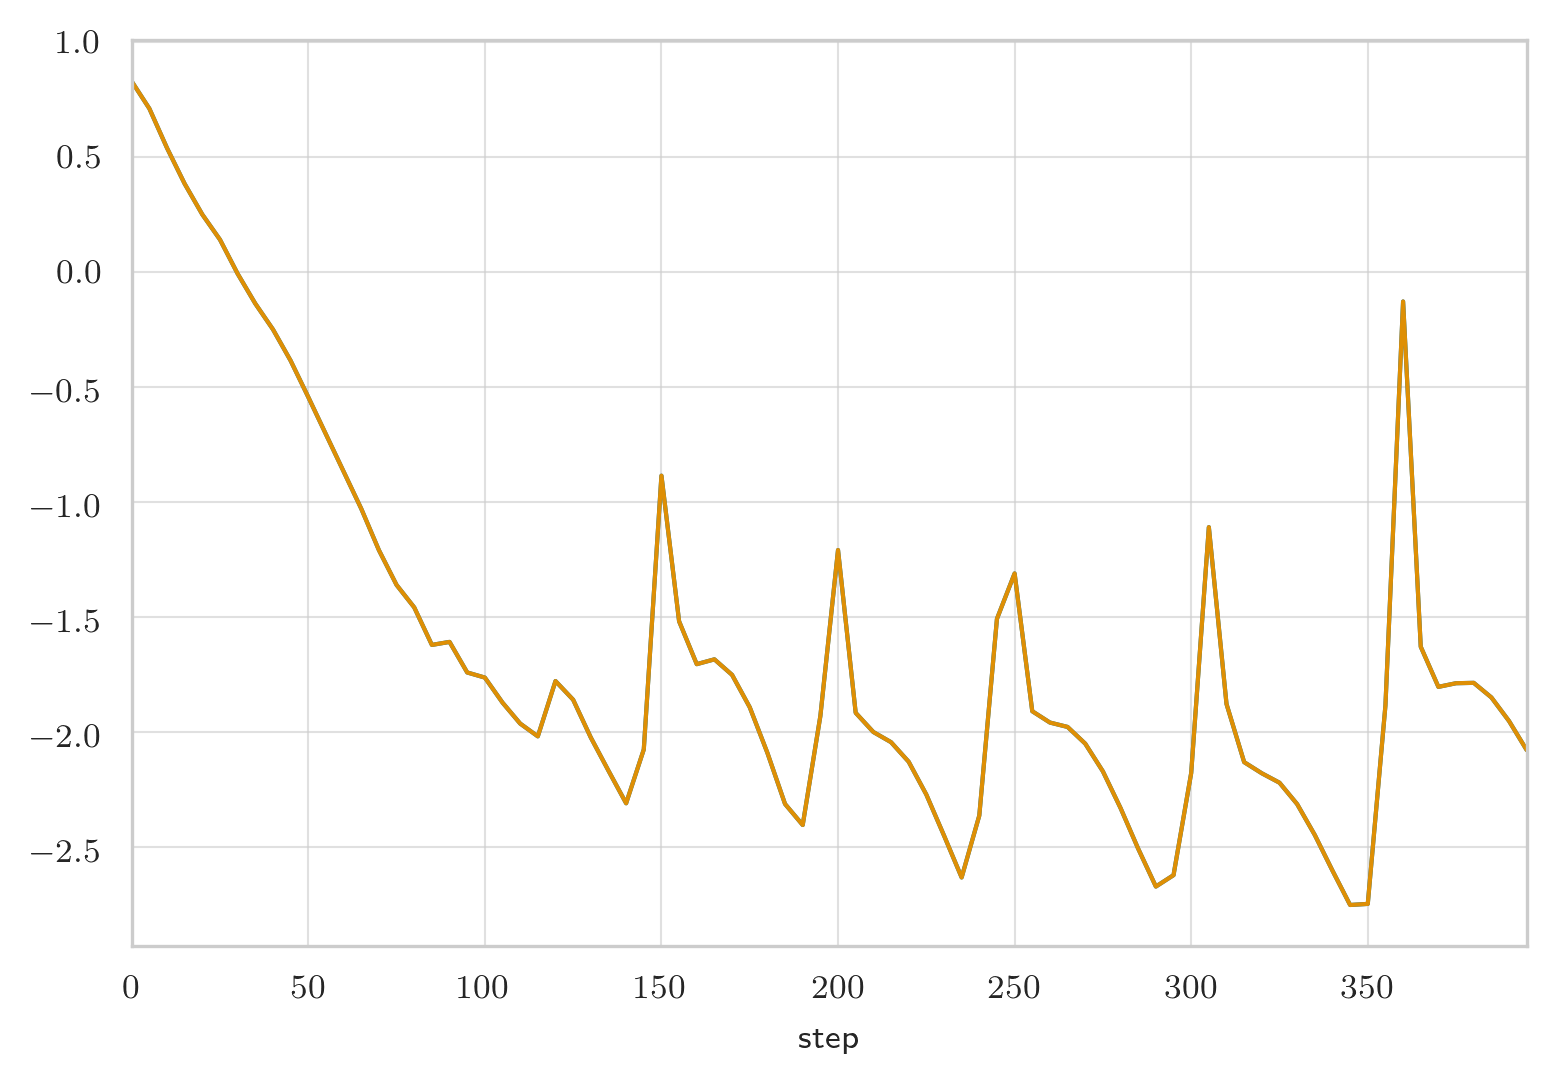

In [96]:
exp = select_experiment_with_rmse(temp_df, 0.020801)
exp.metrics['DKLGPModel.training.loss'].plot()
exp.result['hyperparameters']

{'exp_hash': '05e2381d2f03979ddf72d7f5406f5c20ca685e87',
 'gp_use_derivatives': False,
 'gpu': False,
 'model': {'kwargs': {'model': {'kwargs': {'learning_rate': 0.1,
                                           'max_cg_iter': 30000,
                                           'n_iter': 400,
                                           'nn_kwargs': {'layers': [100,
                                                                    50,
                                                                    5]},
                                           'noise': None,
                                           'noise_lower_bound': 1e-08,
                                           'precond_size': 20,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'},
                      'normalize_input': True,
                      'normalize_output': True},
           'name

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[3.1058437834548323,
    3.211968373532872,
    5.647682117572393,
    4.5364206136473735,
    3.6672406678806033]],
  'dtype': 'float64'},
 'noise': 0.00025026648809196124,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 2.7758875836822834,
  'dtype': 'float64'}}

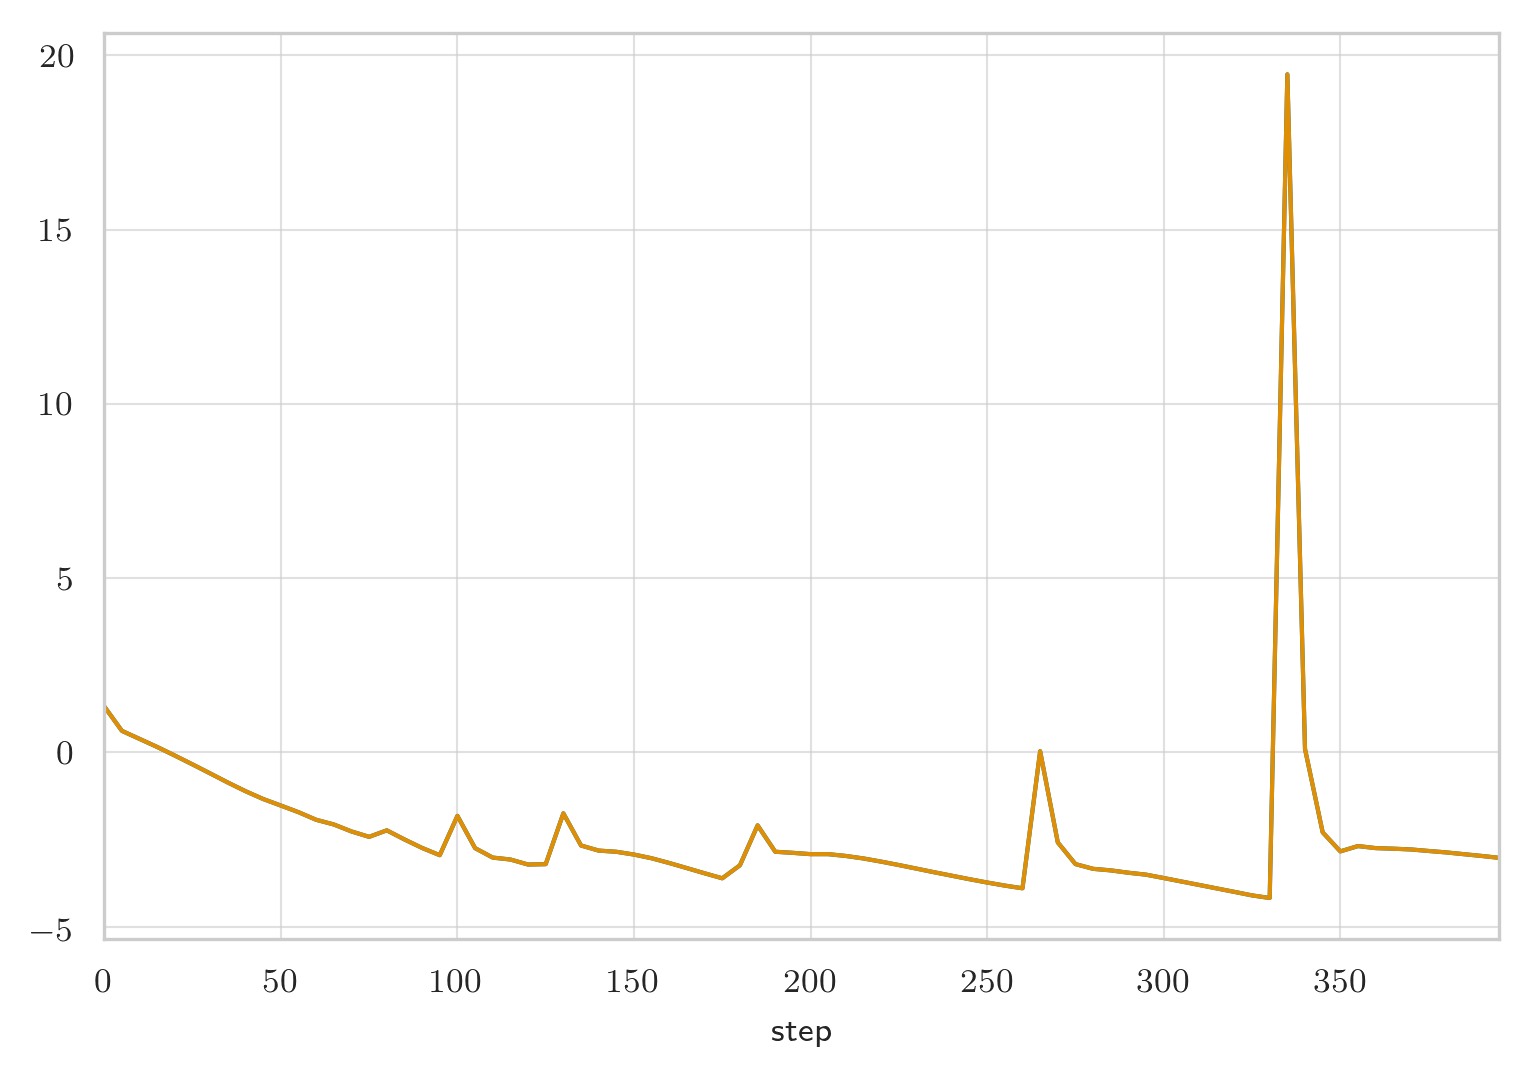

In [70]:
exp = select_experiment_with_rmse(temp_df,0.000978)
exp.metrics['DKLGPModel.training.loss'].plot()
exp.result['hyperparameters']

In [97]:
create_baseline(temp_df)

,config,f,model,model_hash,result.max_err,result.rmse
exp_hash,,,,,,
24ebffa0d1da2b2b8854e0523ec2602131995afe,{'exp_hash': '07e679ca5b05865d84547f3d56ed9ba4...,EconomicModel4,mean,mean,0.198261,0.106091
5f1b9d2c05a7d82278018b11dfc2b81052d9230c,{'exp_hash': '380832f630e5e995d9c87958bf621bc2...,EconomicModel2,mean,mean,0.015617,0.008049
7484148418a8dc36f86ee8dc4db51235bda68441,{'exp_hash': '0fac610304d1bff4c22005165878ebfb...,EconomicModel8,mean,mean,0.196445,0.101380
7dc79e93fcc10c55e24010f82b4b77c314d9aabe,{'exp_hash': '0f96b46c54b4ea3ce0b898b6e0d62969...,EconomicModel12,mean,mean,0.198688,0.105345
c8b6e59169d6b256bace57730da9a8f649b1c3fd,{'exp_hash': '09ae3cb5924202afe42a96e3915a0400...,EconomicModel20,mean,mean,0.147420,0.080168


{'exp_hash': '5a9e8151d7ce5608aff588db1d24a8bb9f83b152',
 'gp_use_derivatives': False,
 'gpu': True,
 'model': {'kwargs': {'model': {'kwargs': {'learning_rate': 0.1,
                                           'max_cg_iter': 30000,
                                           'n_iter': 500,
                                           'nn_kwargs': {'layers': None},
                                           'noise': None,
                                           'noise_lower_bound': 1e-08,
                                           'precond_size': 20,
                                           'use_cg': True,
                                           'use_double_precision': True},
                                'name': 'DKLGPModel'},
                      'normalize_input': True,
                      'normalize_output': True},
           'name': 'NormalizerModel'},
 'model_compare': False,
 'model_hash': '211c5149509d87dd97d4491f2720dca4daf72e25',
 'obj_func': {'kwargs': {'D': 2, 'outp

{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[0.8624914558094545, 0.8934251900462427]],
  'dtype': 'float64'},
 'noise': 1.0507125919028454e-07,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 0.7322171871580354,
  'dtype': 'float64'}}

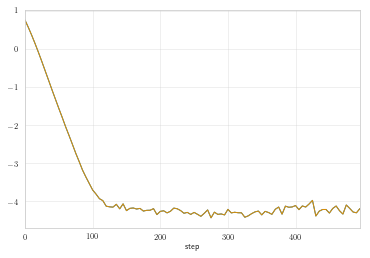

In [36]:
exp = select_experiment_with_rmse(temp_df, 0.000089)
exp.metrics['DKLGPModel.training.loss'].plot()
exp.result['hyperparameters']

{'exp_hash': '6572f6cdb467fe94acf13ce1467799f73bd07312',
 'gp_use_derivatives': False,
 'model': {'kwargs': {'learning_rate': 0.1,
                      'max_cg_iter': 3000,
                      'n_iter': 500,
                      'nn_kwargs': {'layers': None},
                      'noise': None,
                      'precond_size': 10,
                      'use_cg': True},
           'name': 'DKLGPModel'},
 'model_compare': False,
 'model_hash': '9d32b752b4f75c57b78864ed48b244748ff1b226',
 'obj_func': {'kwargs': {'D': 2, 'output_policy': 1}, 'name': 'EconomicModel'},
 'seed': 540858100,
 'tag': 'EconomicModel',
 'verbosity': {'bo_show_iter': 30, 'plot': False}}



{'lengthscale': {'py/object': 'numpy.ndarray',
  'values': [[2.388472318649292, 2.207338333129883]],
  'dtype': 'float32'},
 'noise': 0.00010114352335222065,
 'outputscale': {'py/object': 'numpy.ndarray',
  'values': 0.41848522424697876,
  'dtype': 'float32'}}

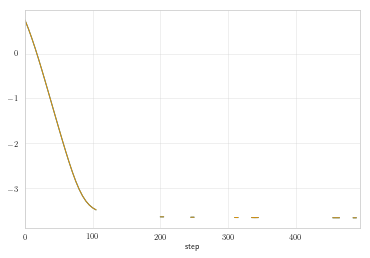

In [182]:
exp = select_experiment_with_rmse(temp_df, 0.000831)
exp.metrics['DKLGPModel.training.loss'].plot()
exp.result['hyperparameters']

In [69]:
# Does not seem to be intrinsically low dimensional.
# Gradient for AS-GP?
# What structure do we know it has?

## AAPL

### Create

In [ ]:
# So noisy we don't need double precision

In [4]:
nn = {
        'name': 'LinearFromFeatureExtractor',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 400,
            'nn_kwargs': {'layers': [100,50,50]},
            'use_double_precision': True,
        }
    }
run = execute(config_updates=normalize_config({
    'tag': 'AAPL',
    'obj_func': {
        'name': 'AAPL',
        'kwargs': {'subset_size': None},
    },
    'model': nn
}))

WARNING - lions - No observers have been added to this run
INFO - lions - Running command 'main'
INFO - lions - Started
INFO - main - Model0: NormalizerModel training on 156780 of dim 2


Iter 1/400 - Loss: 2.210
Iter 21/400 - Loss: 0.958
Iter 41/400 - Loss: 0.909
Iter 61/400 - Loss: 0.909
Iter 81/400 - Loss: 0.908
Iter 101/400 - Loss: 0.908
Iter 121/400 - Loss: 0.908
Iter 141/400 - Loss: 0.908
Iter 161/400 - Loss: 0.908
Iter 181/400 - Loss: 0.908
Iter 201/400 - Loss: 0.908
Iter 221/400 - Loss: 0.908
Iter 241/400 - Loss: 0.908
Iter 261/400 - Loss: 0.908
Iter 281/400 - Loss: 0.908
Iter 301/400 - Loss: 0.908
Iter 321/400 - Loss: 0.908
Iter 341/400 - Loss: 0.925
Iter 361/400 - Loss: 0.924
Iter 381/400 - Loss: 0.910


INFO - main - Model0: NormalizerModel predicting on 17420 of dim 2
INFO - main - Model0: NormalizerModel has {'mae': 0.002668339681738748, 'max_err': 0.013774396608000644, 'rmse': 0.003655854509970595, 'mnlp': nan, 'nmse': 0.08221130776796375}
INFO - lions - Result: {'mae': 0.002668339681738748, 'max_err': 0.013774396608000644, 'rmse': 0.003655854509970595, 'mnlp': nan, 'nmse': 0.08221130776796375, 'time:training': 1737.118686, 'time:pred': 0.27616699999998673}
INFO - lions - Completed after 0:05:35


In [47]:
# Testing DKL for feature learning 2->2 (3->2)
# DKL + KISS-GP
# DKL
# GP

settings.SERVER_DEST = 'epfl'

Ns = [10000, 50000, 139360]

nn = {
        'name': 'LinearFromFeatureExtractor',
        'kwargs': {
            'learning_rate': 0.1,
            'n_iter': 500,
            'nn_kwargs': {'layers': [1000,500,50]},
        }
    }

dnnblr = {
        'name': 'DNNBLR',
        'kwargs': {
            'do_pretrain': False,
            #'pretrain_n_iter': 200,
            'learning_rate': 0.1,
            'n_iter': 500,
            'nn_kwargs': {'layers': [1000, 500, 50]},
            'max_cg_iter': 30000,
            'precond_size': 50,
            'use_cg': True,
            'noise': None,
            'use_double_precision': True,
            #'noise_lower_bound': 1e-8
        }
    }

for N in [10000, 50000, 139360]:
    run = execute(config_updates=normalize_config({
        'tag': 'AAPL',
        'obj_func': {
            'name': 'AAPL',
            'kwargs': {'subset_size': N},
        },
        'model': nn
    }))

for N in [10000, 50000]:
    run = execute(config_updates=normalize_config({
        'tag': 'AAPL',
        'obj_func': {
            'name': 'AAPL',
            'kwargs': {'subset_size': N},
        },
        'model': dnnblr
    }))

Ns = [5000, 10000, 50000]
for N in Ns:
    run = execute(config_updates=normalize_config({
        'tag': 'AAPL',
        'obj_func': {
            'name': 'AAPL',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': [100, 50, 2]},
                'gp_kwargs': {'n_grid': None},
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                'use_cg': True,
                'noise': None
            }
        }
    }))

    run = execute(config_updates=normalize_config({
        'tag': 'AAPL',
        'obj_func': {
            'name': 'AAPL',
            'kwargs': {'subset_size': N},
        },
        'model': {
            'name': 'DKLGPModel',
            'kwargs': {
                'learning_rate': 0.1,
                'n_iter': 200,
                'nn_kwargs': {'layers': None},
                'gp_kwargs': {'n_grid': None},
                'max_cg_iter': 30000,
                'precond_size': 50,
                'use_double_precision': True,
                'use_cg': True,
                'noise': None
            }
        }
    }))


['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="AAPL"\' \'obj_func={"name": "AAPL", "kwargs": {"subset_size": 10000}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "LinearFromFeatureExtractor", "kwargs": {"learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": [1000, 500, 50]}}}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 67492\n'
['ssh', 'simba', 'cd mthesis; sbatch hpc.sh \'python\' \'runner.py\' \'with\' \'tag="AAPL"\' \'obj_func={"name": "AAPL", "kwargs": {"subset_size": 10000}}\' \'model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DNNBLR", "kwargs": {"do_pretrain": False, "learning_rate": 0.1, "n_iter": 500, "nn_kwargs": {"layers": [1000, 500, 50]}, "max_cg_iter": 30000, "precond_size": 50, "use_cg": True, "noise": None, "use_double_precision": True}}, "normalize_input": True, "normalize_output": True}}\'']
b'Submitted batch job 67493\n'
['ssh', 'simba', 'cd mthesis; sba

In [ ]:
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '10:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

run = execute(config_updates=normalize_config({
    'tag': 'AAPL',
    'obj_func': {
        'name': 'AAPL',
        'kwargs': {'subset_size': 139360},
    },
    'model': dnnblr
}))

In [141]:
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '10:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

Ns = [139360]#[10000, 50000, 139360]
Ms = [100]#[70, 100]

for M in Ms:
    M = int(M)
    for N in Ns:
        run = execute(config_updates=normalize_config({
            'tag': 'AAPL',
            'obj_func': {
                'name': 'AAPL',
                'kwargs': {'subset_size': N},
            },
            'model': {
                'name': 'DKLGPModel',
                'kwargs': {
                    'learning_rate': 0.01,
                    'n_iter': 20,
                    'nn_kwargs': {'layers': None},
                    'gp_kwargs': {'n_grid': M},
                    'max_cg_iter': 30000,
                    'precond_size': 50,
                    'use_toeplitz': False,
                    #'use_double_precision': True,
                    'use_cg': True,
                    'noise': None
                }
            }
        }))


source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="AAPL"\x27 \x27obj_func={"name": "AAPL", "kwargs": {"subset_size": 139360}}\x27 \x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 20, "nn_kwargs": {"layers": None}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 30000, "precond_size": 50, "use_toeplitz": False, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/10:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="AAPL"\\x27 \\x27obj_func={"name": "AAPL", "kwargs": {"subset_size": 139360}}\\x27 \\x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_i

In [102]:
settings.SERVER_DEST = 'dtu'
settings.WALLTIME = '10:00'
settings.QUEUE = 'gpuv100'
settings.EXTRA = '#BSUB -R "select[gpu32gb]"'

Ns = [139360]#[10000, 50000, 139360]
Ms = [100]#[70, 100]

for M in Ms:
    M = int(M)
    for N in Ns:
        run = execute(config_updates=normalize_config({
            'tag': 'AAPL',
            'obj_func': {
                'name': 'AAPL',
                'kwargs': {'subset_size': N},
            },
            'model': {
                'name': 'DKLGPModel',
                'kwargs': {
                    'learning_rate': 0.01,
                    'n_iter': 200,
                    'nn_kwargs': {'layers': [100, 50, 2]},
                    'gp_kwargs': {'n_grid': M},
                    'max_cg_iter': 30000,
                    'precond_size': 50,
                    #'use_double_precision': True,
                    'use_cg': True,
                    'noise': None
                }
            }
        }))


source /etc/profile; cd mthesis; sed 's/CMD/\x27python\x27 \x27runner.py\x27 \x27with\x27 \x27tag="AAPL"\x27 \x27obj_func={"name": "AAPL", "kwargs": {"subset_size": 139360}}\x27 \x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 200, "nn_kwargs": {"layers": [100, 50, 2]}, "gp_kwargs": {"n_grid": 100}, "max_cg_iter": 30000, "precond_size": 50, "use_cg": True, "noise": None}}, "normalize_input": True, "normalize_output": True}}\x27/g' < hpc-dtu.sh.template | sed 's/QUEUE/gpuv100/g' | sed 's/WALLTIME/10:00/g' | sed 's/EXTRA/#BSUB -R "select[gpu32gb]"/g'  | bsub
['ssh', 's144448@login2.hpc.dtu.dk', 'source /etc/profile; cd mthesis; sed \'s/CMD/\\x27python\\x27 \\x27runner.py\\x27 \\x27with\\x27 \\x27tag="AAPL"\\x27 \\x27obj_func={"name": "AAPL", "kwargs": {"subset_size": 139360}}\\x27 \\x27model={"name": "NormalizerModel", "kwargs": {"model": {"name": "DKLGPModel", "kwargs": {"learning_rate": 0.01, "n_iter": 200, "nn

### View

In [105]:
df = get_df()
exps_rows_df = df[df["tag"] == "AAPL"].copy()
exps_rows_df

,N,acq,bo,config,exp,f,id,model,model2,model_hash,...,result.max_err,result.mll,result.mnlp,result.nmse,result.pmll,result.rmse,result.time:pred,result.time:training,status,tag
exp_hash,,,,,,,,,,,,,,,,,,,,,
1d872ee7ec72e3b16f1b72998dace7bb41708226,10000.0,None,False,{'exp_hash': '1d872ee7ec72e3b16f1b72998dace7bb...,"Experiment(id=2139, name=lions)",AAPL,2139,N<DKLGPModel>,None,ad29df9d4e4b1d2c731f27e8c1391688e0433232,...,0.018644,NaN,-39160.076763,0.150633,NaN,0.005009,1.86,92.42,COMPLETED,AAPL
286feda2f1e6e76f62c83b3120495020df9f15ae,10000.0,None,False,{'exp_hash': '286feda2f1e6e76f62c83b3120495020...,"Experiment(id=2120, name=lions)",AAPL,2120,N<DKLGPModel>,None,80de5a8a098dce8e5f547f8f1e0a95e5f807d8ed,...,0.014201,NaN,-39165.050145,0.103171,NaN,0.004025,6.55,1985.43,COMPLETED,AAPL
28db21235fd7ae423de0d9c62c4c6094cbf79d6d,5000.0,None,False,{'exp_hash': '28db21235fd7ae423de0d9c62c4c6094...,"Experiment(id=2117, name=lions)",AAPL,2117,N<DKLGPModel>,None,10590e62e7d5c65344cd41479c94a0eff9940de3,...,0.019147,NaN,-39434.195463,0.199527,NaN,0.005673,2.51,584.58,COMPLETED,AAPL
3671998c80fa520315cc174a64f041d00363c29d,50000.0,None,False,{'exp_hash': '3671998c80fa520315cc174a64f041d0...,"Experiment(id=2114, name=lions)",AAPL,2114,N<LinearFromFeatureExtractor>,None,7a6bc52503a2166aefb1e647f0e712887eb2efad,...,0.047810,NaN,NaN,1.506734,NaN,0.018606,0.39,1665.65,COMPLETED,AAPL
3e26d718c632bdf51e654f7f1601a056667fa32f,5000.0,None,False,{'exp_hash': '3e26d718c632bdf51e654f7f1601a056...,"Experiment(id=2119, name=lions)",AAPL,2119,N<DKLGPModel>,None,80de5a8a098dce8e5f547f8f1e0a95e5f807d8ed,...,0.014295,NaN,-39464.650329,0.109058,NaN,0.004035,3.44,613.32,COMPLETED,AAPL
8257c8edab0594ecdb542b10772b2a38debccd2d,10000.0,None,False,{'exp_hash': '8257c8edab0594ecdb542b10772b2a38...,"Experiment(id=2146, name=lions)",AAPL,2146,N<DKLGPModel>,None,7b02e3070e7ad81b1010d638290cf667d0281153,...,0.014199,NaN,-39147.550845,0.103149,NaN,0.004025,1.55,91.65,COMPLETED,AAPL
a91b5f8d318ea90941bcf2e4c57666511af706e0,10000.0,None,False,{'exp_hash': 'a91b5f8d318ea90941bcf2e4c5766651...,"Experiment(id=2143, name=lions)",AAPL,2143,N<DKLGPModel>,None,123596b28ab142d5bd3c7634fdac0ebf712f7211,...,0.014202,NaN,-39230.587016,0.103245,NaN,0.004026,1.43,90.85,COMPLETED,AAPL
ace842b7040a4d7bec271585bb212207ed6e126e,10000.0,None,False,{'exp_hash': 'ace842b7040a4d7bec271585bb212207...,"Experiment(id=2112, name=lions)",AAPL,2112,N<LinearFromFeatureExtractor>,None,7a6bc52503a2166aefb1e647f0e712887eb2efad,...,0.019360,NaN,NaN,0.195042,NaN,0.005602,0.50,352.27,COMPLETED,AAPL
c2fdc896ec5f4764c3ffb83cc5edd466e1439a0f,10000.0,None,False,{'exp_hash': 'c2fdc896ec5f4764c3ffb83cc5edd466...,"Experiment(id=2136, name=lions)",AAPL,2136,N<DKLGPModel>,None,73508710524c9c8f2ada0128edf0d706afd926c7,...,0.016475,NaN,-39143.671948,0.134470,NaN,0.004705,1.75,92.02,COMPLETED,AAPL


In [106]:
def get_M(r):
    SS_M = r.config.model.kwargs.model.kwargs.feature_extractor_constructor.kwargs.get('M', None)
    if SS_M is not None:
        return SS_M
    SGPR_M = r.config.model.kwargs.model.kwargs.gp_kwargs.get('inducing_points', None)
    if SGPR_M is not None:
        return SGPR_M
    return r.config.model.kwargs.model.kwargs.gp_kwargs.get('n_grid', None)

temp_df = exps_rows_df
#temp_df = aggregate_results(exps_rows_df)
temp_df['layers'] = temp_df.apply(lambda row: row.config.model.kwargs.model.kwargs.nn_kwargs.get('layers'), axis=1)
temp_df['layers'] = temp_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)

temp_df['M'] = temp_df.apply(get_M, axis=1)
temp_df['double'] = temp_df.apply(lambda r: r.config.model.kwargs.model.kwargs.get('use_double_precision', False), axis=1)
view_df(temp_df, indexes=['double', 'model', 'layers', 'M', 'N'], cols=['result.rmse', 'result.max_err', 'result.time:training']).sort_index()

result.rmse  \
double model                         layers          M     N        f                   
False  N<DKLGPModel>                 ()              70.0  10000.0  AAPL     0.004026   
                                                     100.0 10000.0  AAPL     0.004025   
                                     (100, 50, 2)    70.0  10000.0  AAPL     0.004705   
                                                     100.0 10000.0  AAPL     0.005009   
       N<LinearFromFeatureExtractor> (1000, 500, 50) NaN   10000.0  AAPL     0.005602   
                                                           50000.0  AAPL     0.018606   
                                                           139360.0 AAPL     0.003607   
True   N<DKLGPModel>                 ()              NaN   5000.0   AAPL     0.004035   
                                                           10000.0  AAPL     0.004025   
                                     (100, 50, 2)    NaN   5000.0   AAPL     0.005673   
                                                           10000.0  AAPL     0.004657   
       N<DNNBLR>                     (1000, 500, 50) NaN   10000.0  AAPL     0.005918   
                                                           50000.0  AAPL     0.003695   

                                                                          result.max_err  \
double model                         layers          M     N        f                      
False  N<DKLGPModel>                 ()              70.0  10000.0  AAPL        0.014202   
                                                     100.0 10000.0  AAPL        0.014199   
                                     (100, 50, 2)    70.0  10000.0  AAPL        0.016475   
                                                     100.0 10000.0  AAPL        0.018644   
       N<LinearFromFeatureExtractor> (1000, 500, 50) NaN   10000.0  AAPL        0.019360   
                                                           50000.0  AAPL        0.047810   
                                                           139360.0 AAPL        0.013321   
True   N<DKLGPModel>                 ()              NaN   5000.0   AAPL        0.014295   
                                                           10000.0  AAPL        0.014201   
                                     (100, 50, 2)    NaN   5000.0   AAPL        0.019147   
                                                           10000.0  AAPL        0.015427   
       N<DNNBLR>                     (1000, 500, 50) NaN   10000.0  AAPL        0.019824   
                                                           50000.0  AAPL        0.012543   

                                                                          result.time:training  
double model                         layers          M     N        f                           
False  N<DKLGPModel>                 ()              70.0  10000.0  AAPL                 90.85  
                                                     100.0 10000.0  AAPL                 91.65  
                                     (100, 50, 2)    70.0  10000.0  AAPL                 92.02  
                                                     100.0 10000.0  AAPL                 92.42  
       N<LinearFromFeatureExtractor> (1000, 500, 50) NaN   10000.0  AAPL                352.27  
                                                           50000.0  AAPL               1665.65  
                                                           139360.0 AAPL               4769.26  
True   N<DKLGPModel>                 ()              NaN   5000.0   AAPL                613.32  
                                                           10000.0  AAPL               1985.43  
                                     (100, 50, 2)    NaN   5000.0   AAPL                584.58  
                                                           10000.0  AAPL               2086.61  
       N<DNNBLR>                     (1000, 500, 50) NaN   10000.0  AAPL                970.99  

In [105]:
create_baseline(temp_df)

,config,f,model,model_hash,result.max_err,result.rmse
exp_hash,,,,,,
92d23aa397ac6d7473d6f17bf5de7ea48a3824b5,{'exp_hash': '1455df7844453cf8071b5193334f9256...,AAPL,mean,mean,0.357994,0.043264


# Appendix

## Nonstationarity

In [ ]:
## 


obj_funs = [
    {'name': 'Step'},
    {'name': 'Kink1D'},
    {'name': 'Kink2D'},
    {'name': 'TwoKink1D'},
    {'name': 'TwoKink2D'},
    {'name': 'TwoKinkDEmbedding', 'kwargs': {'D': 2}},
]
add_noiselevels(obj_funs)

# ExactGP: Matern32, RBF
exactGP = [{
    'name': 'GPModel',
    'kwargs': {
        'kernel': {
            'name': kernel,
            'kwargs': {
                'lengthscale': 1
            }
        },
        'noise_prior': 1e-2,
        'do_optimize': True,
        'num_mcmc': 0,
    },
} for kernel in ['GPyRBF', 'GPyMatern32']]


# DKL "ExactGP": RBF
n_iters = [100, 1000]
DKL_exact = [{
    'name': 'DKLGPModel',
    'kwargs': {
        'noise': 1e-2,
        'n_iter': n_iter,
        'nn_kwargs': {
            'layers': None, 
        }
    }
} for n_iter in n_iters]

# DKL:  n_iter, learning_rate, layers, (noise)
import itertools
n_iters = [100, 1000]
learning_rates = [0.05, 0.01, 0.1]
layerss = [(100, 50, 1), (100, 50, 2), (50, 2)]
parameters = itertools.product(n_iters, learning_rates, layerss)
DKL = [{
    'name': 'DKLGPModel',
    'kwargs': {
        'noise': 1e-2,
        'learning_rate': learning_rate,
        'n_iter': n_iter,
        'nn_kwargs': {
            'layers': layers, 
        }
    }
} for (n_iter, learning_rate, layers) in parameters]

model_types = [exactGP, DKL_exact, DKL]


#%%

i = 0

for obj_fun in obj_funs:
    for model_type in model_types:
        for model in model_type:
            i += 1
            print(i)
            config = {
                'tag': 'DKL-properties',
                'obj_func': obj_fun,
                'model': model,
                'gp_samples': 1000,
            }
            # import traceback
            # try:
            execute(config_updates=config)
            # except Exception as exc:
            #     print(traceback.format_exc())
            #     print(exc)


In [ ]:
exps_rows_df = df[df["tag"] == "DKL-properties"].copy()
exps_rows_df

In [ ]:
# DKLModel
dkl_df = exps_rows_df[exps_rows_df['model'] == 'DKLGPModel']

dkl_df['layers'] = dkl_df.apply(lambda row: row.config.model.kwargs.nn_kwargs.get('layers'), axis=1)
dkl_df['layers'] = dkl_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)
dkl_df['n_iter'] = dkl_df.apply(lambda row: row.config.model.kwargs.get('n_iter'), axis=1)
dkl_df['learning_rate'] = dkl_df.apply(lambda row: row.config.model.kwargs.get('learning_rate'), axis=1)

dkl_df = aggregate_results(dkl_df)

dkl_df.set_index(['layers', 'n_iter', 'learning_rate', 'f']).sort_values('result.rmse').sort_index()['result.rmse'].unstack('f')

In [177]:
# DKLModel
dkl_df = exps_rows_df[exps_rows_df['model'] == 'DKLGPModel']

dkl_df['layers'] = dkl_df.apply(lambda row: row.config.model.kwargs.nn_kwargs.get('layers'), axis=1)
dkl_df['layers'] = dkl_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)
dkl_df['n_iter'] = dkl_df.apply(lambda row: row.config.model.kwargs.get('n_iter'), axis=1)
dkl_df['learning_rate'] = dkl_df.apply(lambda row: row.config.model.kwargs.get('learning_rate'), axis=1)

dkl_df = aggregate_results(dkl_df)

dkl_df.set_index(['layers', 'n_iter', 'learning_rate', 'f']).sort_values('result.rmse').sort_index()['result.rmse'].unstack('f')

f                                       Kink1D        Kink2D  TwoKink1D  \
layers       n_iter learning_rate                                         
()           100    NaN              40.564451      0.340182   0.010807   
             1000   NaN              22.261545      0.241523   0.010431   
(50, 2)      100    0.01             46.833457      0.245758   0.003105   
                    0.05             38.854175      0.259719   0.007192   
                    0.10            665.959308      0.319627   0.008811   
             1000   0.01             15.594846      0.175867   0.002129   
                    0.05              8.961886      0.149103   0.004047   
                    0.10            635.244723      0.230515   0.010110   
(100, 50, 1) 100    0.01              8.043969      1.117372   0.006613   
                    0.05            134.372790   3679.609431   0.006813   
                    0.10             32.934717    201.671027   0.008772   
             1000   0.01             19.029000  35199.185020   0.002050   
                    0.05           9123.170546    335.663872   0.005822   
                    0.10             14.214432      2.531896   0.009130   
(100, 50, 2) 100    0.01              8.797606      0.190712   0.003573   
                    0.05             78.439449      1.912683   0.004806   
                    0.10            703.212399      0.962892   0.009263   
             1000   0.01             52.721589      0.103437   0.002899   
                    0.05            596.646663      0.133583   0.006074   
                    0.10            514.400083      1.803077   0.006397   

f                                  TwoKink2D  TwoKinkDEmbedding2  
layers       n_iter learning_rate                                 
()           100    NaN             0.018990            0.014247  
             1000   NaN             0.018778            0.013787  
(50, 2)      100    0.01            0.020999            0.011813  
                    0.05            0.019159            0.009944  
                    0.10            0.016811            0.011213  
             1000   0.01            0.014711            0.007532  
                    0.05            0.011130            0.005657  
                    0.10            0.018355            0.009472  
(100, 50, 1) 100    0.01            0.015372            0.009454  
                    0.05            0.011307            0.007867  
                    0.10            0.062403            0.036911  
             1000   0.01            0.009799            0.004557  
                    0.05            0.013115            0.005580  
                    0.10            0.027594            0.007243  
(100, 50, 2) 100    0.01            0.013322            0.009958  
                    0.05            0.011888            0.010691  
                    0.10            0.018074            0.010003  
             1000   0.01            0.008708            0.005417  
                    0.05            0.011862            0.006774  
                    0.10            0.011852            0.007422

In [159]:
# GPModel
gp_df = exps_rows_df[exps_rows_df['model'] == 'GPModel']

gp_df['kernel'] = gp_df.apply(lambda row: row.config.model.kwargs.kernel.name, axis=1)

gp_df = aggregate_results(gp_df)
gp_df.set_index(['kernel', 'f']).sort_values('result.rmse').sort_index()['result.rmse'].unstack('f')

f,Kink1D,Kink2D,TwoKink1D,TwoKink2D,TwoKinkDEmbedding2
kernel,,,,,
GPyMatern32,7.548232,0.226828,0.005441,0.016530,0.010103
GPyRBF,8.565553,0.313265,0.010500,0.020283,0.016816


In [172]:
# SG models
SG_df = create_SG_df(exps_rows_df, depth=10, refinement_level=12, f_tol=1e-4)
SG_df.reset_index().set_index(['model_hash', 'f'])[['result.rmse']].unstack('f')

Fitting SG
Fitting A-SG
Fitting SG
Fitting A-SG
Fitting SG
Fitting A-SG
Fitting SG
Fitting A-SG
Fitting SG
Fitting A-SG


result.rmse                                                 
f               Kink1D    Kink2D TwoKink1D TwoKink2D TwoKinkDEmbedding2
model_hash                                                             
A-SG          0.213211  0.293698  0.000010  0.003577           0.001291
SG            9.782623  0.080758  0.000009  0.001220           0.000821

In [179]:
# Stitch together with exp_hash as index
dkl_mod_df = dkl_df
dkl_mod_df['name'] = dkl_mod_df[['layers', 'n_iter', 'learning_rate']].apply(tuple, axis=1)
dkl_mod_df = dkl_mod_df[dkl_mod_df['name'] == ((100, 50, 2), 1000, 0.01)]

gp_mod_df = gp_df
gp_mod_df['name'] = gp_mod_df['kernel']

SG_mod_df = SG_df
SG_mod_df['name'] = SG_mod_df['model']

# Convert to nice view
non_stat_df = pd.concat([dkl_mod_df, gp_mod_df, SG_mod_df])
non_stat_df = non_stat_df.reset_index().set_index(['name', 'f'])[['result.rmse']].unstack('f')
non_stat_df

result.rmse                                \
f                               Kink1D    Kink2D TwoKink1D TwoKink2D   
name                                                                   
((100, 50, 2), 1000, 0.01)   52.721589  0.103437  0.002899  0.008708   
A-SG                          0.213211  0.293698  0.000010  0.003577   
GPyMatern32                   7.548232  0.226828  0.005441  0.016530   
GPyRBF                        8.565553  0.313265  0.010500  0.020283   
SG                            9.782623  0.080758  0.000009  0.001220   

                                               
f                          TwoKinkDEmbedding2  
name                                           
((100, 50, 2), 1000, 0.01)           0.005417  
A-SG                                 0.001291  
GPyMatern32                          0.010103  
GPyRBF                               0.016816  
SG                                   0.000821

In [247]:
# \label{table:non-stat}
save_table(non_stat_df.set_index('name').to_latex(escape=False), 'non-stat')

## CG implementation comparison

In [ ]:

obj_funs = [
    {'name': 'Sinc'},
    {'name': 'Branin'},
    {'name': 'TwoKink1D'},
]
add_noiselevels(obj_funs)

exactGP = {
    'name': 'GPModel',
    'kwargs': {
        'kernel': {
            'name': 'GPyRBF',
            'kwargs': {
                'lengthscale': 1
            }
        },
        'noise_prior': 1e-2,
        'do_optimize': True,
        'num_mcmc': 0,
    },
}


# DKL "ExactGP": RBF
import itertools
n_iters = [100, 1000]
learning_rates = [0.05, 0.01, 0.1]
parameters = itertools.product(n_iters, learning_rates)

DKL_exact = [{
    'name': 'DKLGPModel',
    'kwargs': {
        'noise': 1e-2,
        'n_iter': n_iter,
        'learning_rate': learning_rate,
        'nn_kwargs': {
            'layers': None, 
        }
    }
} for (n_iter, learning_rate) in parameters]

for obj_fun in obj_funs:
    for model in DKL_exact:
        config = {
            'tag': 'certify-ExactDKL',
            'obj_func': obj_fun,
            'model': model,
            'model2': exactGP,
            'gp_samples': 1000,
            'model_compare': True
        }
        execute(config_updates=config)
